<div style="background-color: #28a745 !important; color: white; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">STMKGxHMGI Long Course</p>
    <h1>Sesi: Membaca dan Mengolah Data Rekaman Sederhana</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px ">
    <ul>
        <li>Tujuan: Memperkenalkan cara membaca dan mengolah sederhana data rekaman gempa</li>
        <li>Keluaran: Peserta dapat memahami cara pengolahan sederhana data rekaman gempa</li>
        <li>Sesi Materi</li>
        <li>Waktu/Tempat: Sabtu, 25 September 2021/ Zoom</li>
    </ul>
</div>

## Membaca data rekaman gempa

Modul `obspy` memungkinkan kita membaca data rekaman dalam berbagai macam format seperti `miniseed`,`SAC`, dan yang lain. Pada materi ini kita akan berikan contoh membaca data rekaman gempa dari stasiun GSI jaringan GE yang merekam gempa Mamuju M 6,2. Cara membaca data rekaman ini menggunakan fungsi `read`:

In [1]:
import numpy as np
from obspy import read, Trace, Stream
import matplotlib.pyplot as plt
from obspy import read, UTCDateTime as UTC
from obspy.clients.fdsn import Client
#from sshypo_utils import read_picks, calc_rms, calc_polarity, create_ts_tp_grid, calc_hypo_lat_lon, getEndpoint
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import contextily as ctx
from obspy.geodetics.base import kilometer2degrees as km2deg
import os
# %matplotlib inline
from obspy.clients.fdsn.header import FDSNNoDataException, FDSNException

In [2]:
from __future__ import print_function
import matplotlib.pylab as plt
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
import obspy
st = obspy.read("data/Event_KAPI.mseed")

Informasi mengenai data dapat kita lihat dengan fungsi `print`:

In [4]:
print(st)

3 Trace(s) in Stream:
II.KAPI.10.BH1 | 2021-12-14T03:20:19.019539Z - 2021-12-14T03:22:18.994539Z | 40.0 Hz, 4800 samples
II.KAPI.10.BH2 | 2021-12-14T03:20:19.019539Z - 2021-12-14T03:22:18.994539Z | 40.0 Hz, 4800 samples
II.KAPI.10.BHZ | 2021-12-14T03:20:19.019539Z - 2021-12-14T03:22:18.994539Z | 40.0 Hz, 4800 samples


Dari informasi tentang data rekaman kita dapat melihat ada 3 `trace` dengan komponen BHE,BHN, dan BH dengan frekuensi sampling 20 Hz

Hasil pembacaan berupa obyek `Stream` yang kita beri nama `st`, untuk melihat metode apa saja yang bisa dilakukan kita bisa melihat petunjuknya:

In [5]:
help(st)

Help on Stream in module obspy.core.stream object:

class Stream(builtins.object)
 |  Stream(traces=None)
 |  
 |  List like object of multiple ObsPy :class:`~obspy.core.trace.Trace`
 |  objects.
 |  
 |  :type traces: list of :class:`~obspy.core.trace.Trace`, optional
 |  :param traces: Initial list of ObsPy :class:`~obspy.core.trace.Trace`
 |      objects.
 |  
 |  .. rubric:: Basic Usage
 |  
 |  >>> trace1 = Trace()
 |  >>> trace2 = Trace()
 |  >>> stream = Stream(traces=[trace1, trace2])
 |  >>> print(stream)  # doctest: +ELLIPSIS
 |  2 Trace(s) in Stream:
 |  ...
 |  
 |  .. rubric:: Supported Operations
 |  
 |  ``stream = streamA + streamB``
 |      Merges all traces within the two Stream objects ``streamA`` and
 |      ``streamB`` into the new Stream object ``stream``.
 |      See also: :meth:`Stream.__add__`.
 |  ``stream += streamA``
 |      Extends the Stream object ``stream`` with all traces from ``streamA``.
 |      See also: :meth:`Stream.__iadd__`.
 |  ``len(stream)``
 

## Mengeplot data rekaman

Melihat petunjuk di atas kita ternyata bisa mengeplot data rekaman menggunakan metode `plot`:

<IPython.core.display.Javascript object>


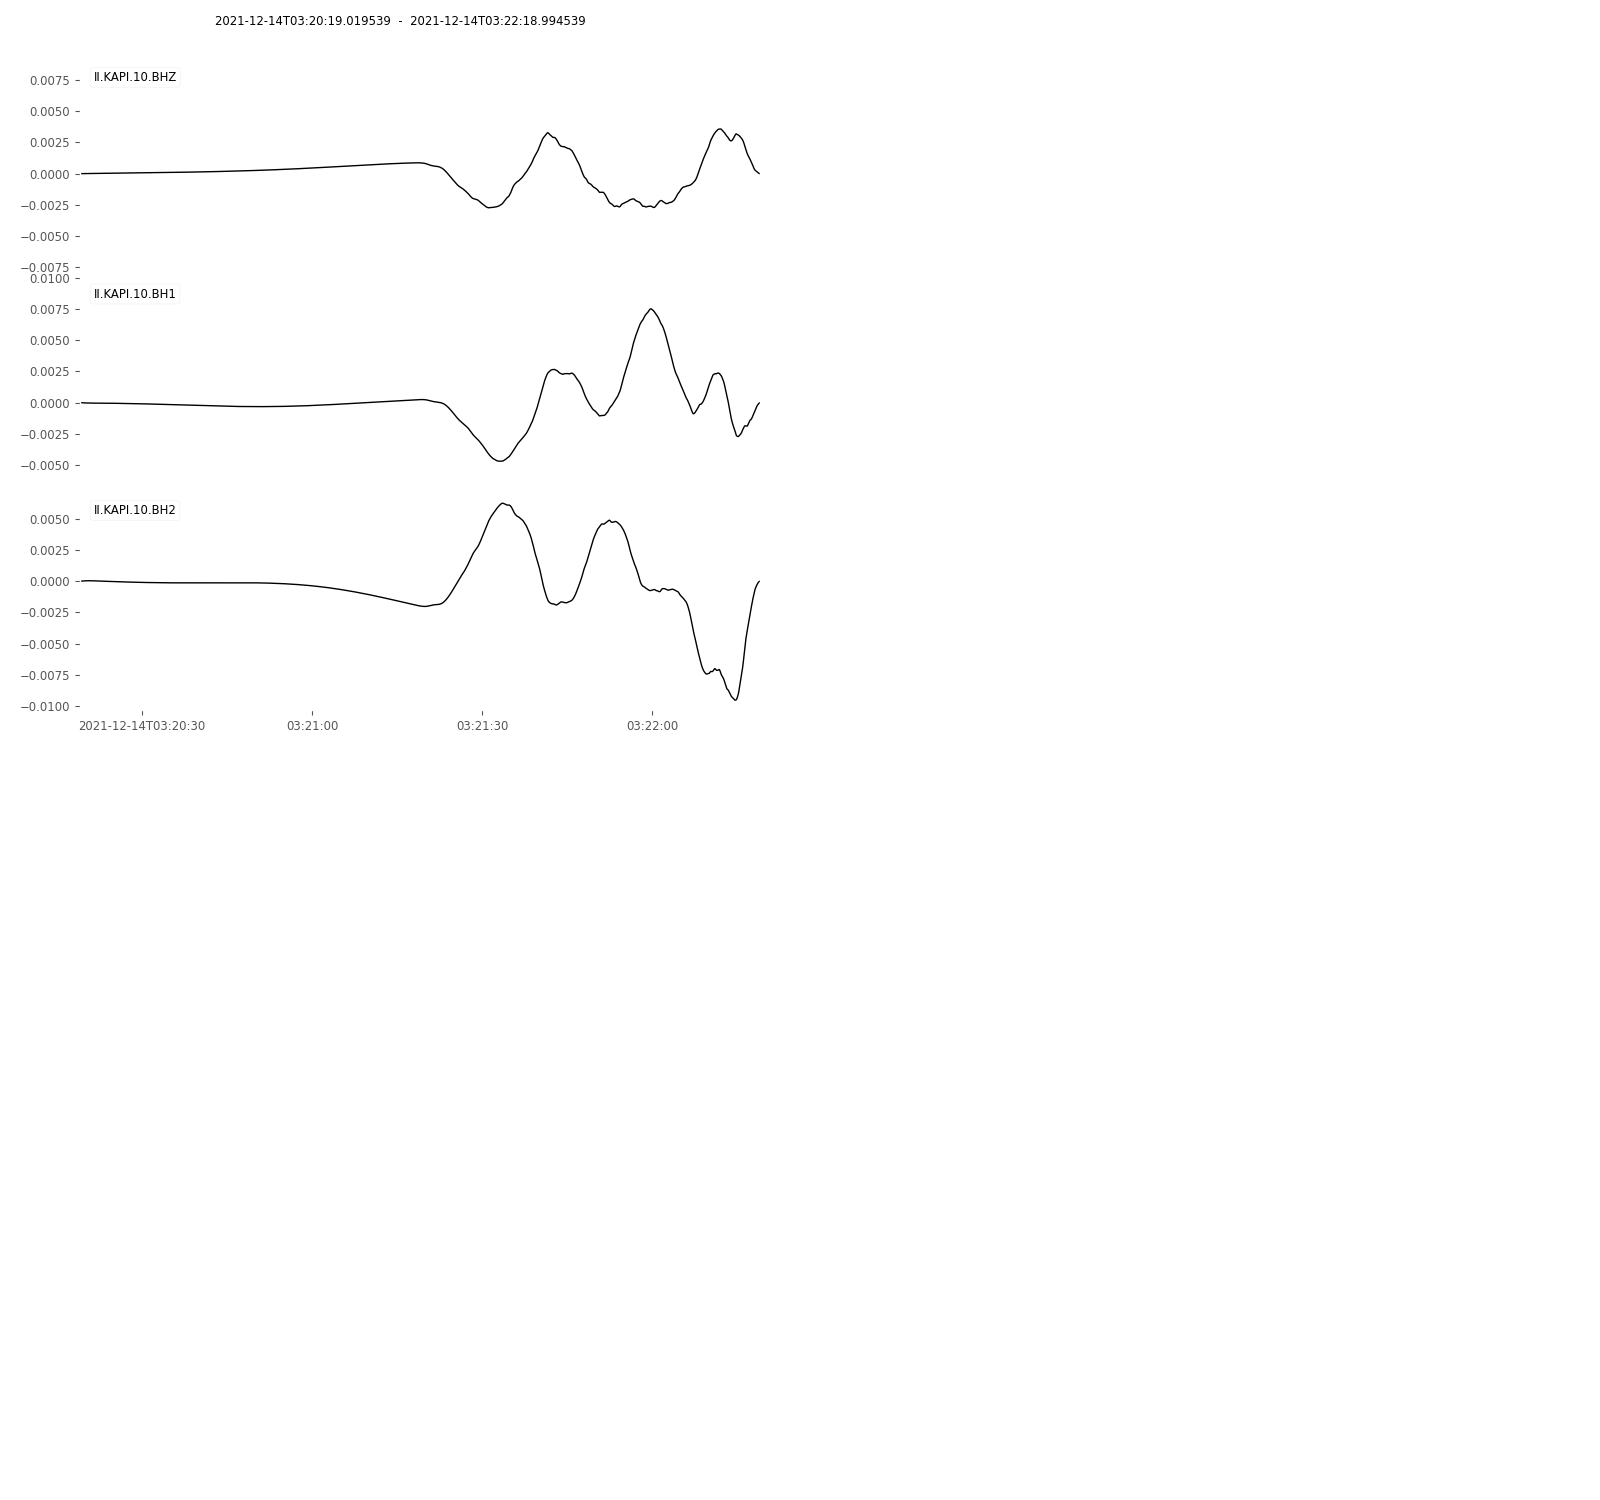

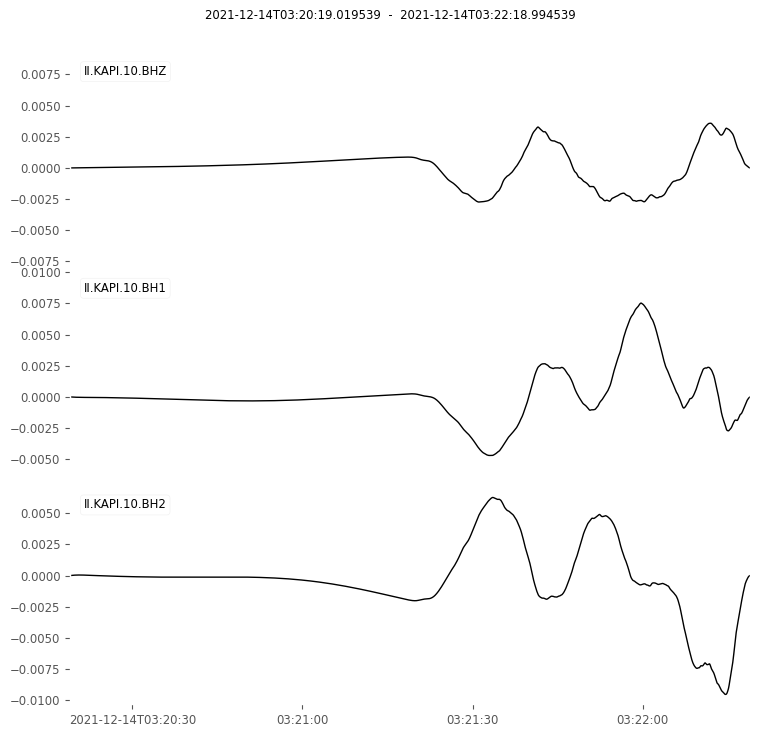

In [6]:
st.plot()

## Melakukan filtering

`Stream` bisa kita filter dengan metode `filter`, filtering dapat dilakukan baik untuk Lowpass, Highpass, maupun Bandpass:

<IPython.core.display.Javascript object>


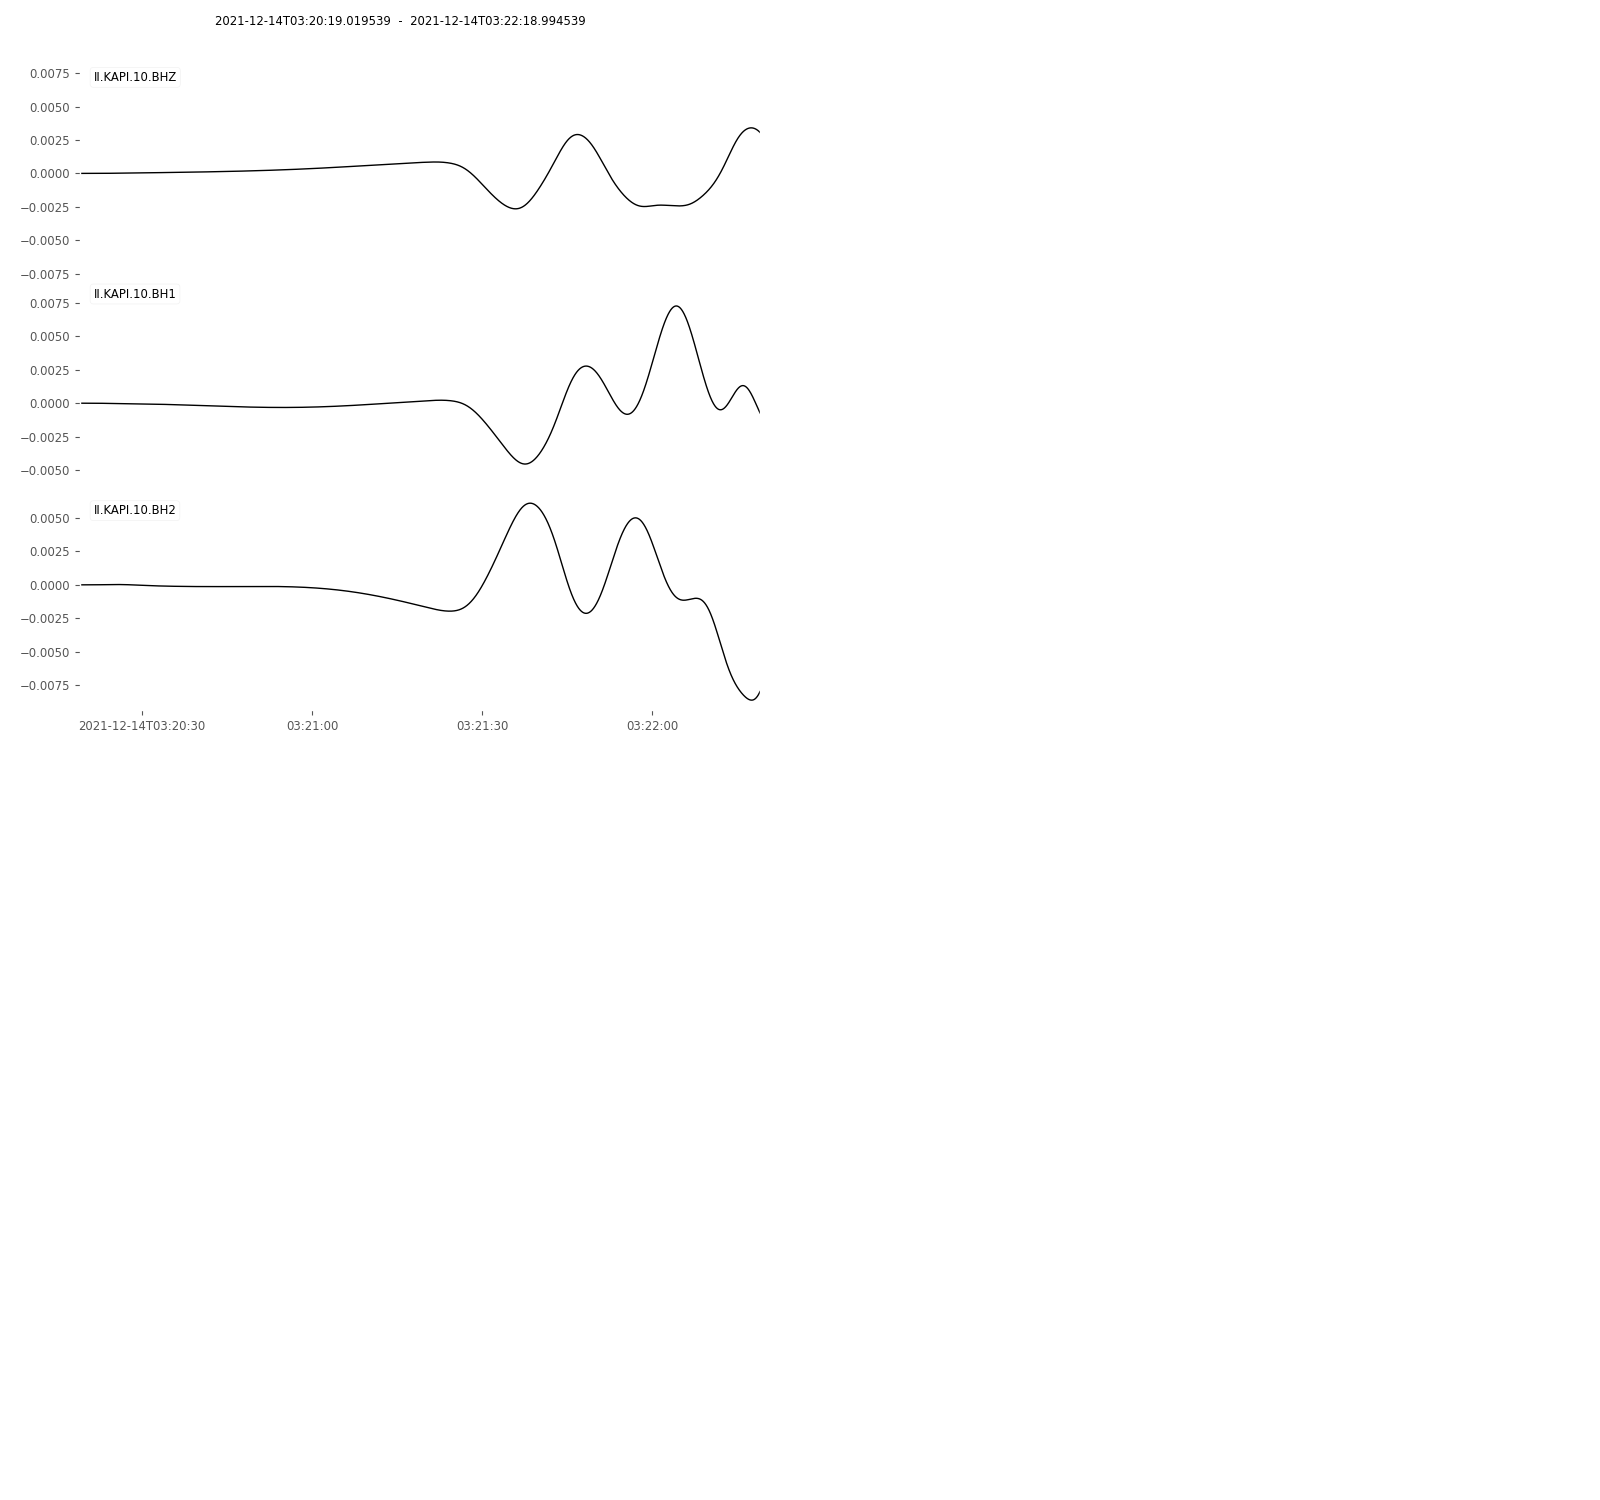

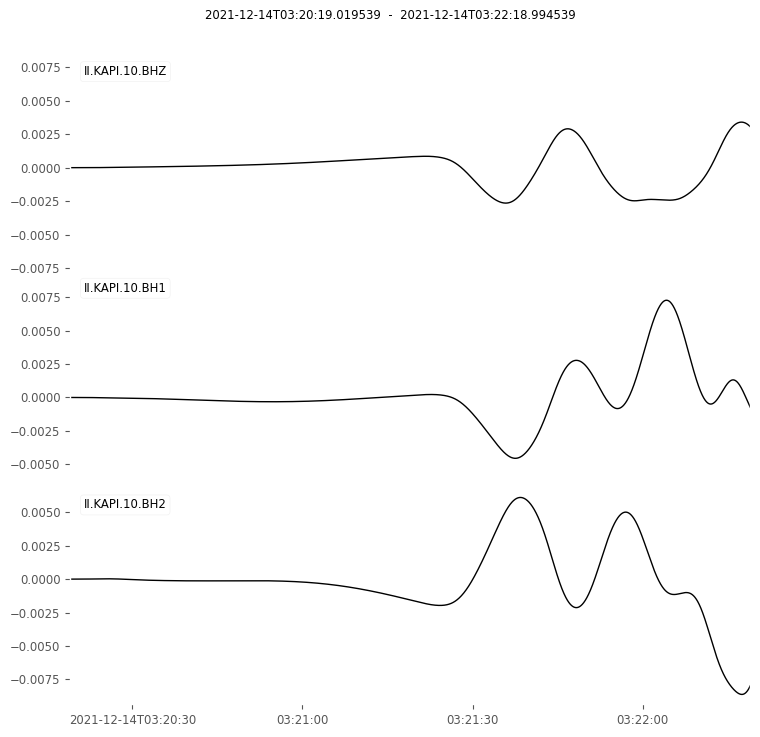

In [7]:
st_LP_01 = st.copy()
st_LP_01.filter("lowpass",freq=0.1) #low pass 0.1hz
st_LP_01.plot()

<IPython.core.display.Javascript object>


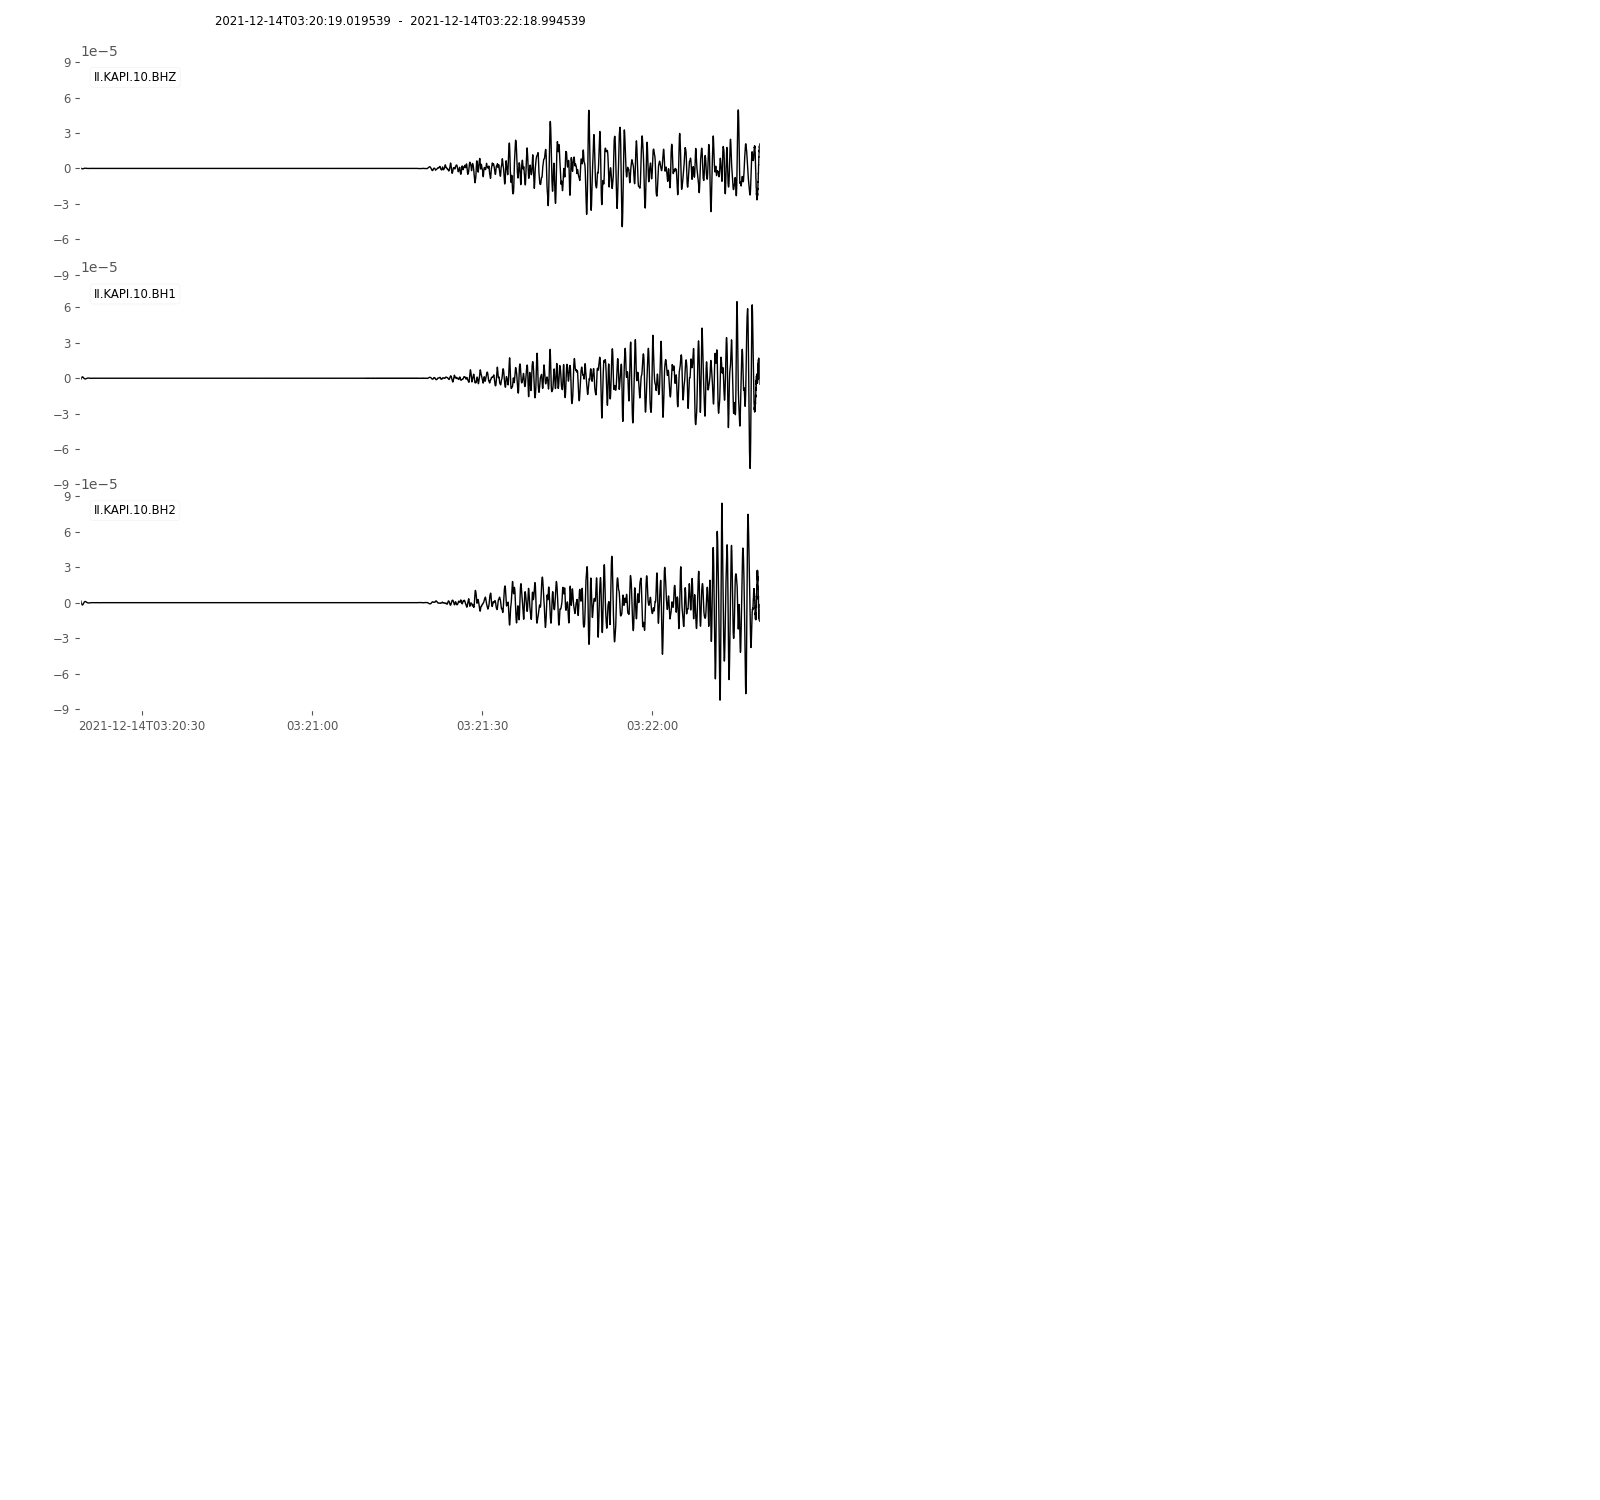

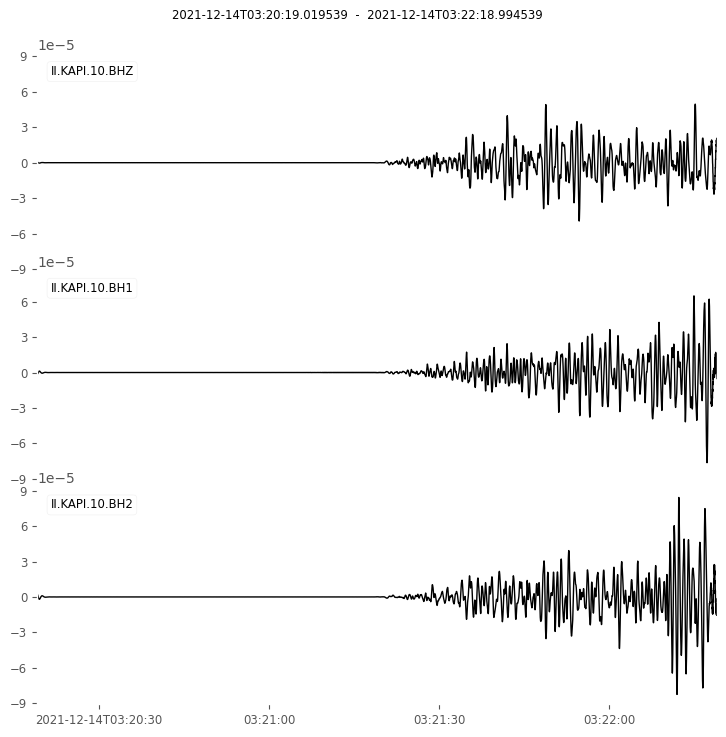

In [8]:
st_HP_1 = st.copy()
st_HP_1.filter("highpass",freq=1) #high pass 1hz
st_HP_1.plot()

<IPython.core.display.Javascript object>


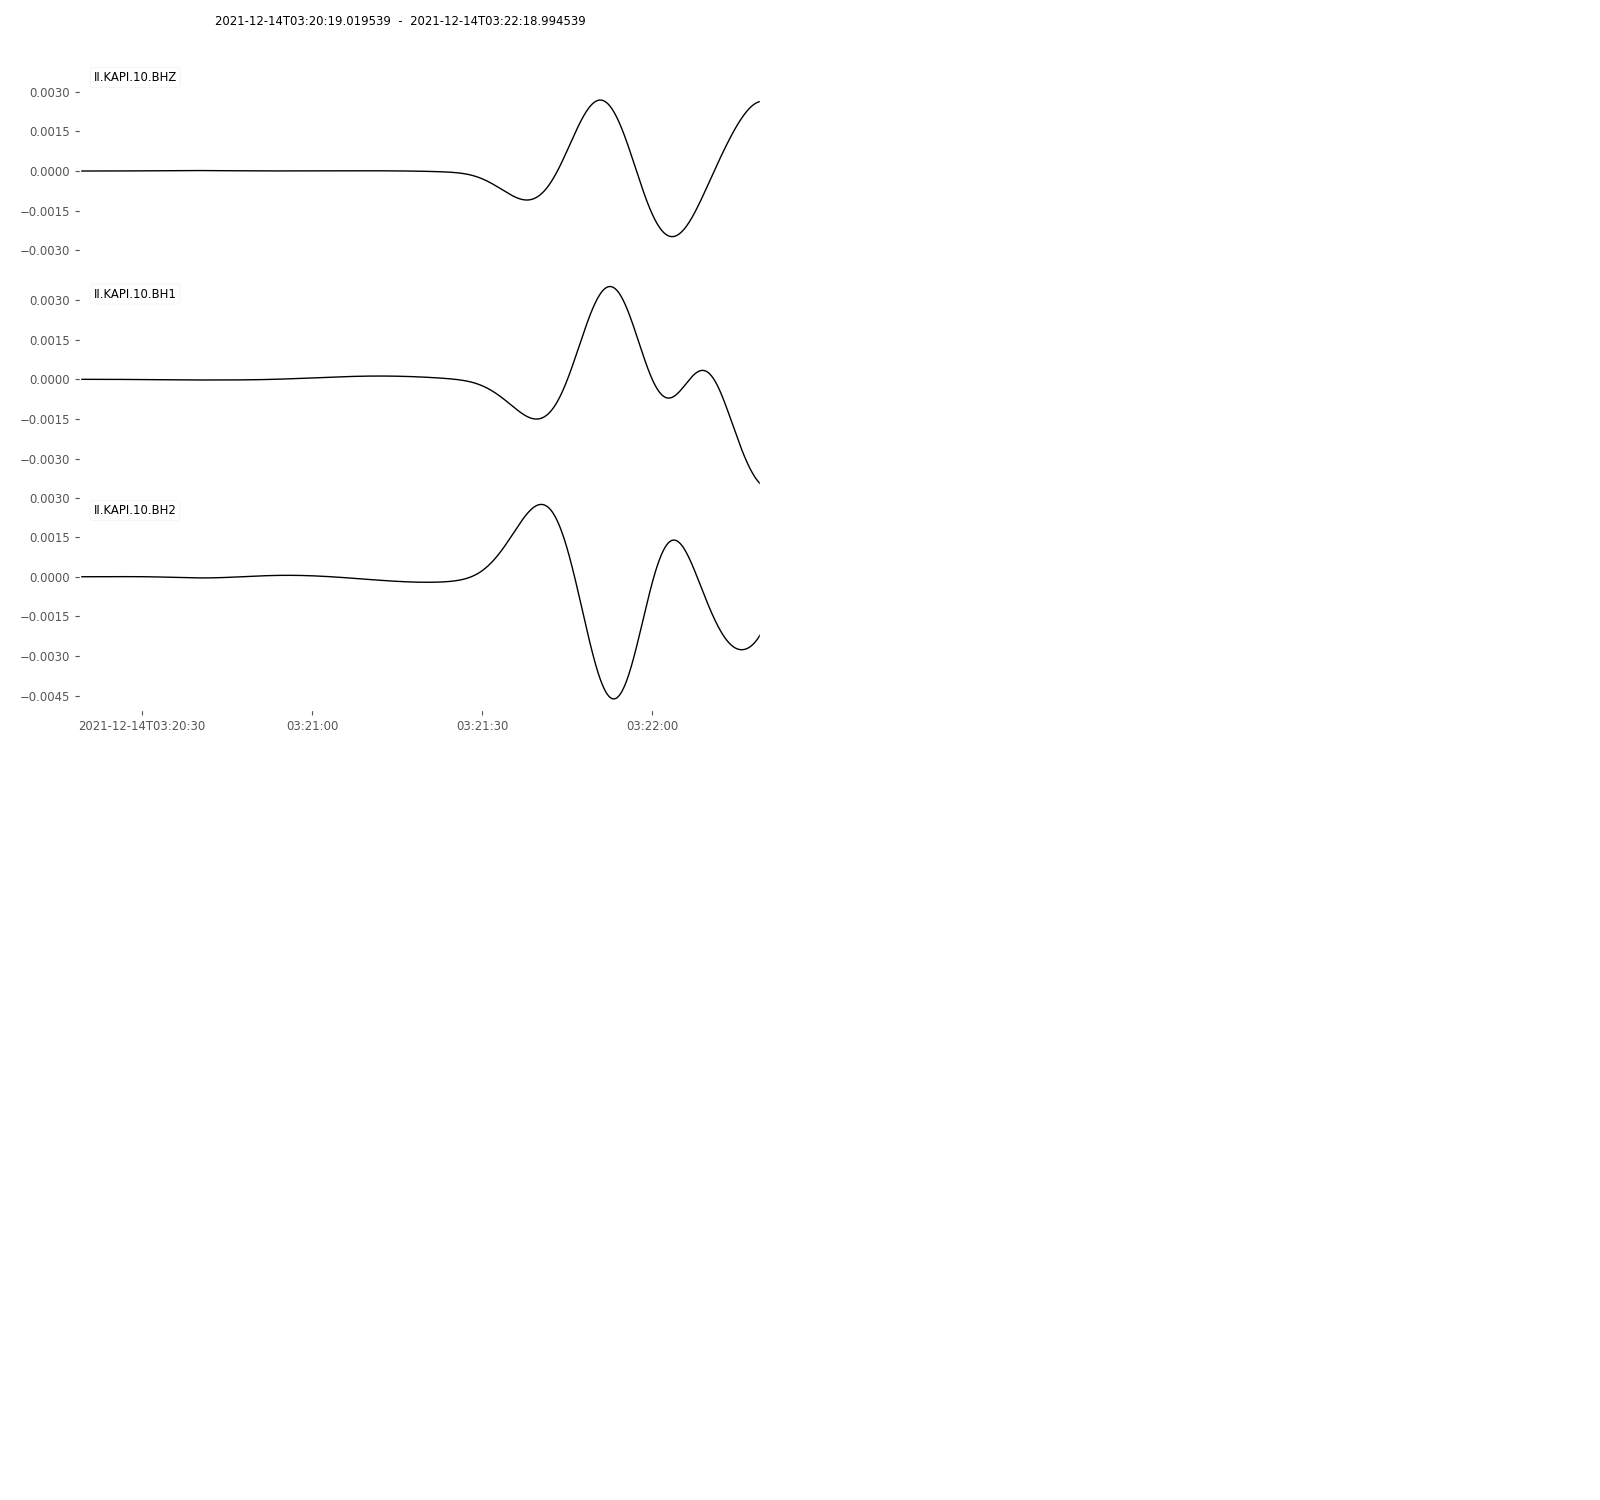

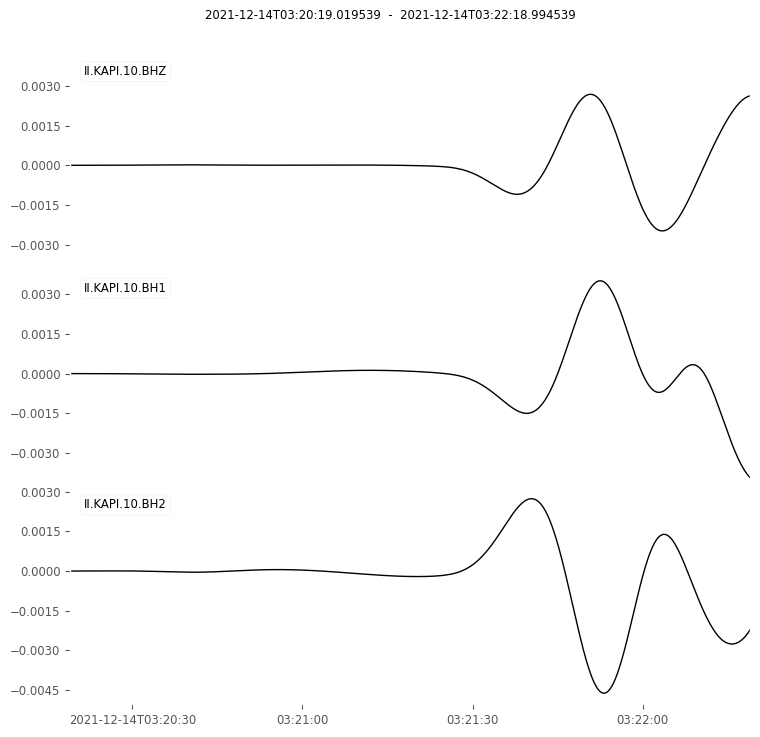

In [9]:
st_BP_23 = st.copy()
st_BP_23.filter("bandpass",freqmin=0.01, freqmax=0.05) #bandpass 0.01-0.05
st_BP_23.plot()

### Memotong stream

Kita dapat memotong stream menggunakan metode `slice`:

<IPython.core.display.Javascript object>


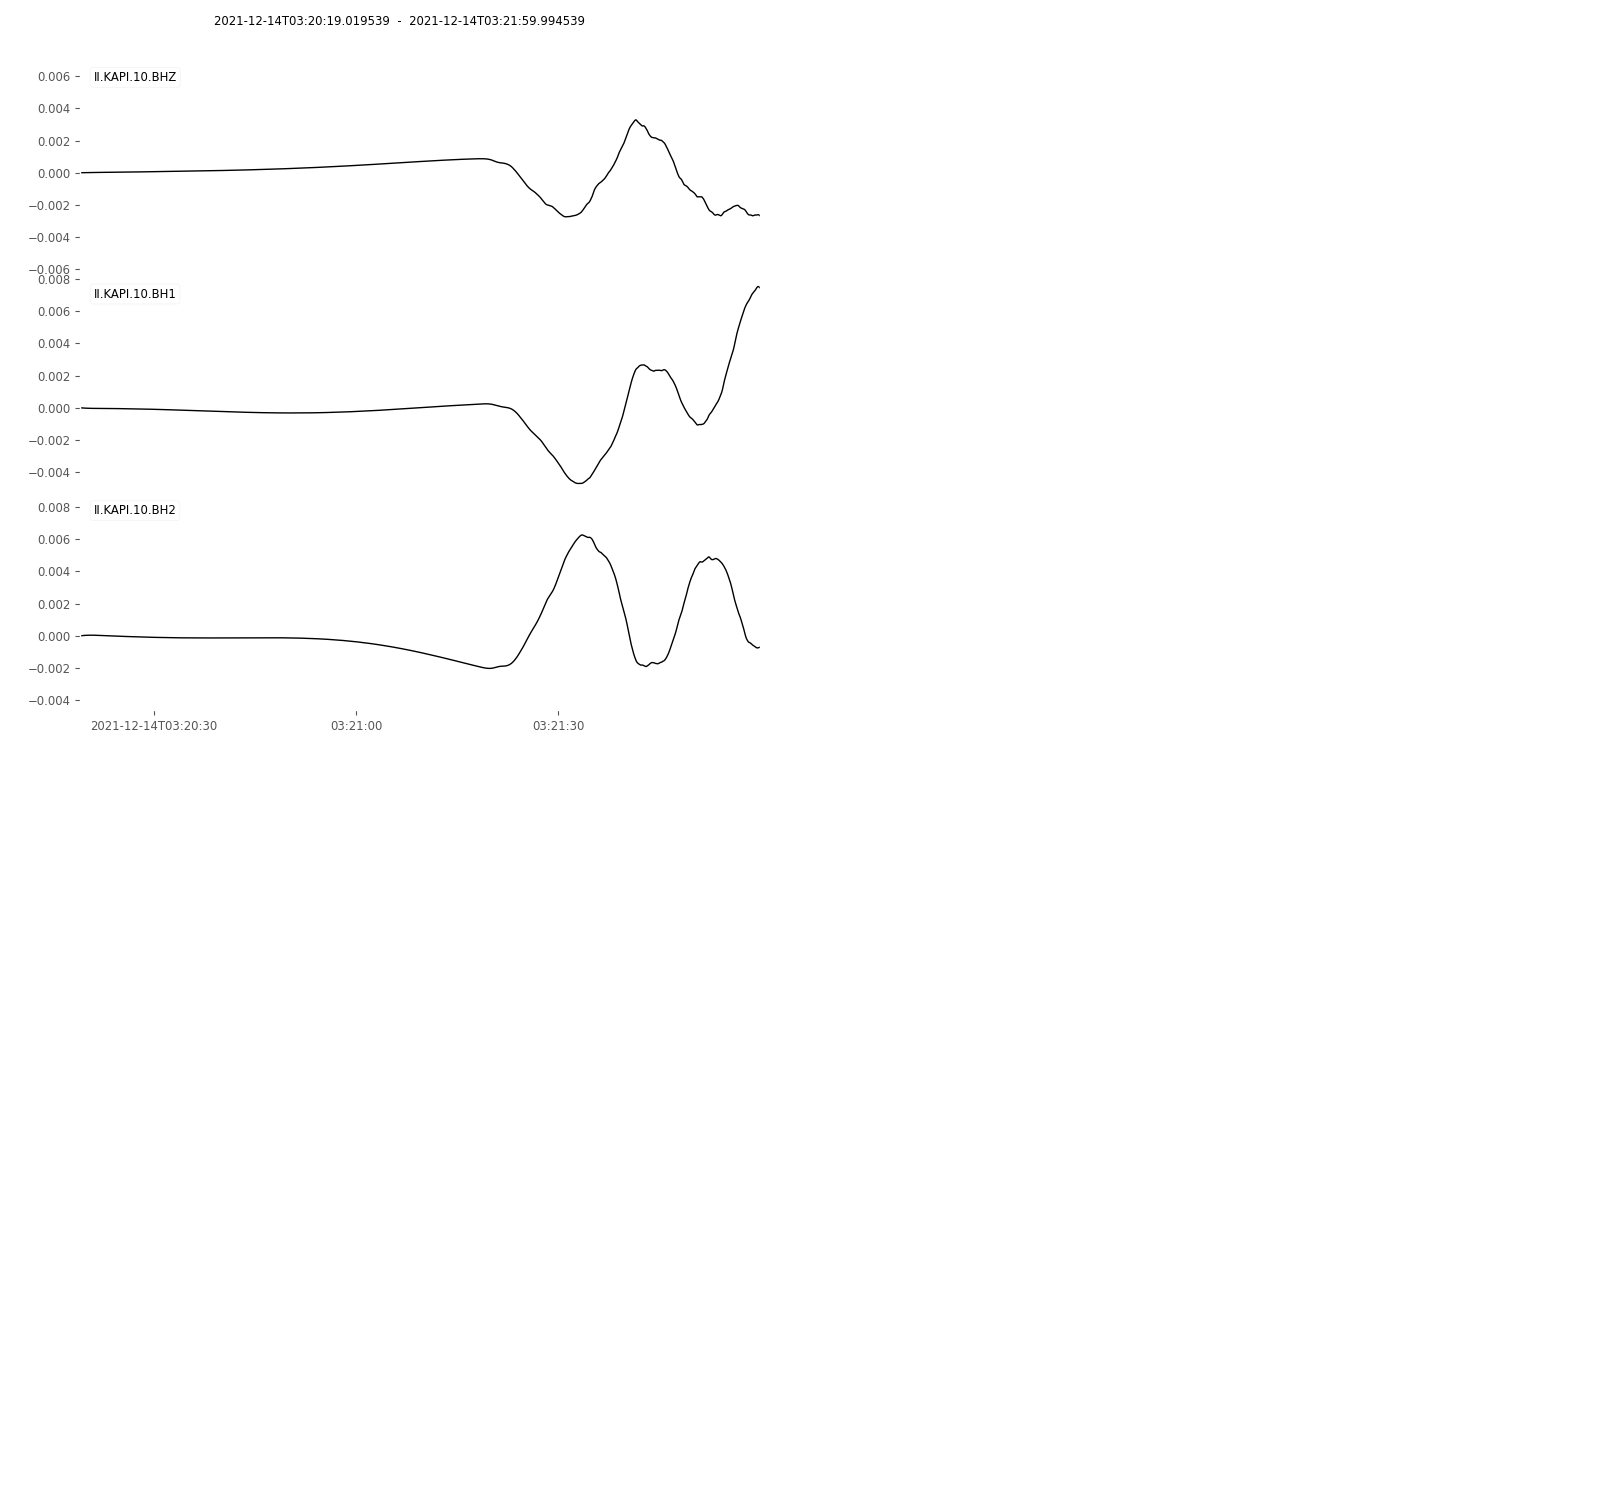

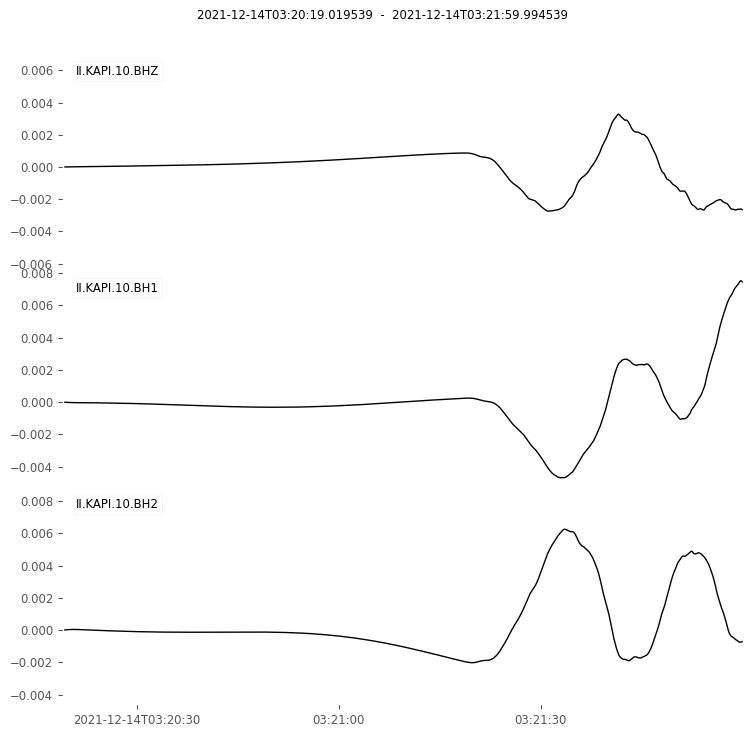

In [10]:
from obspy import UTCDateTime
start=UTCDateTime("2021-12-14T03:20:00")
stop=start + 2*60 #2 menit
st_slice=st.copy()
st_slice=st_slice.slice(start,stop)
st_slice.plot()

### Mengeplot spektrogram

Spektrogram juga dapat diplot menggunakan metode `spectrogram`:

<IPython.core.display.Javascript object>


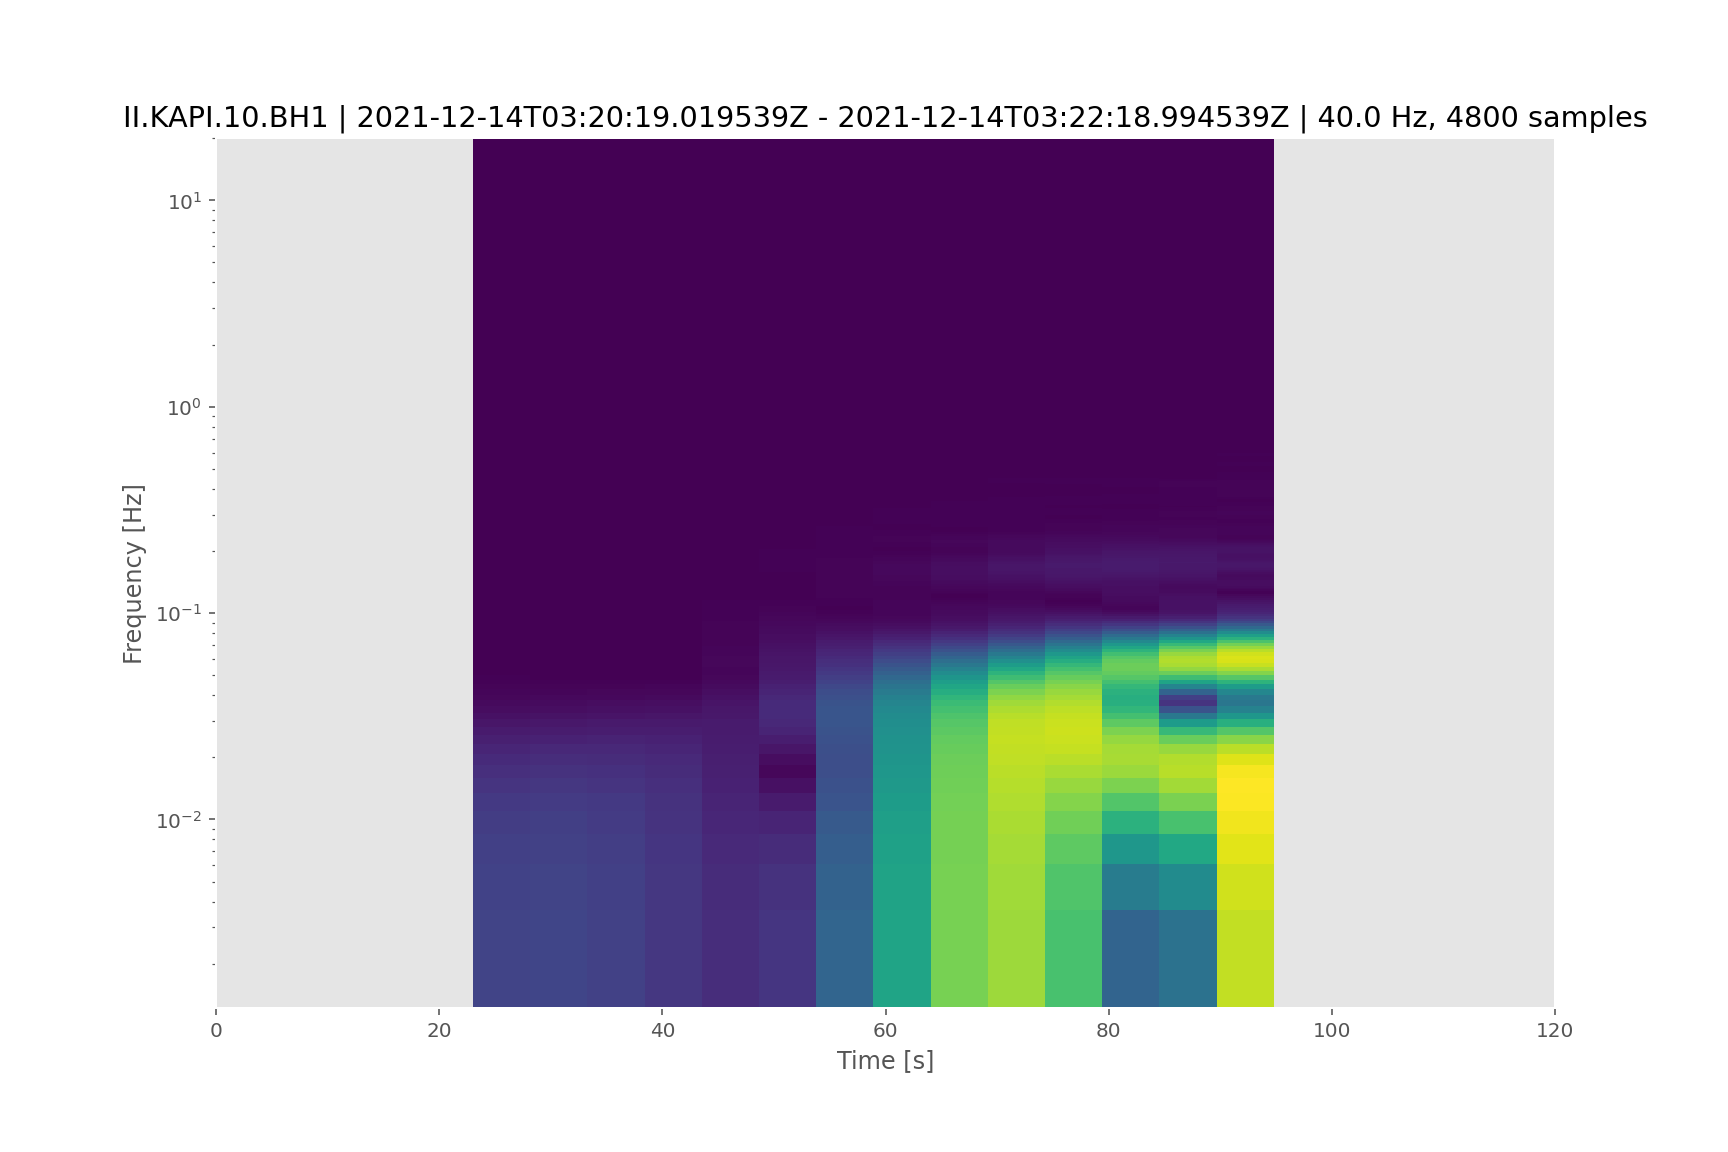

<IPython.core.display.Javascript object>


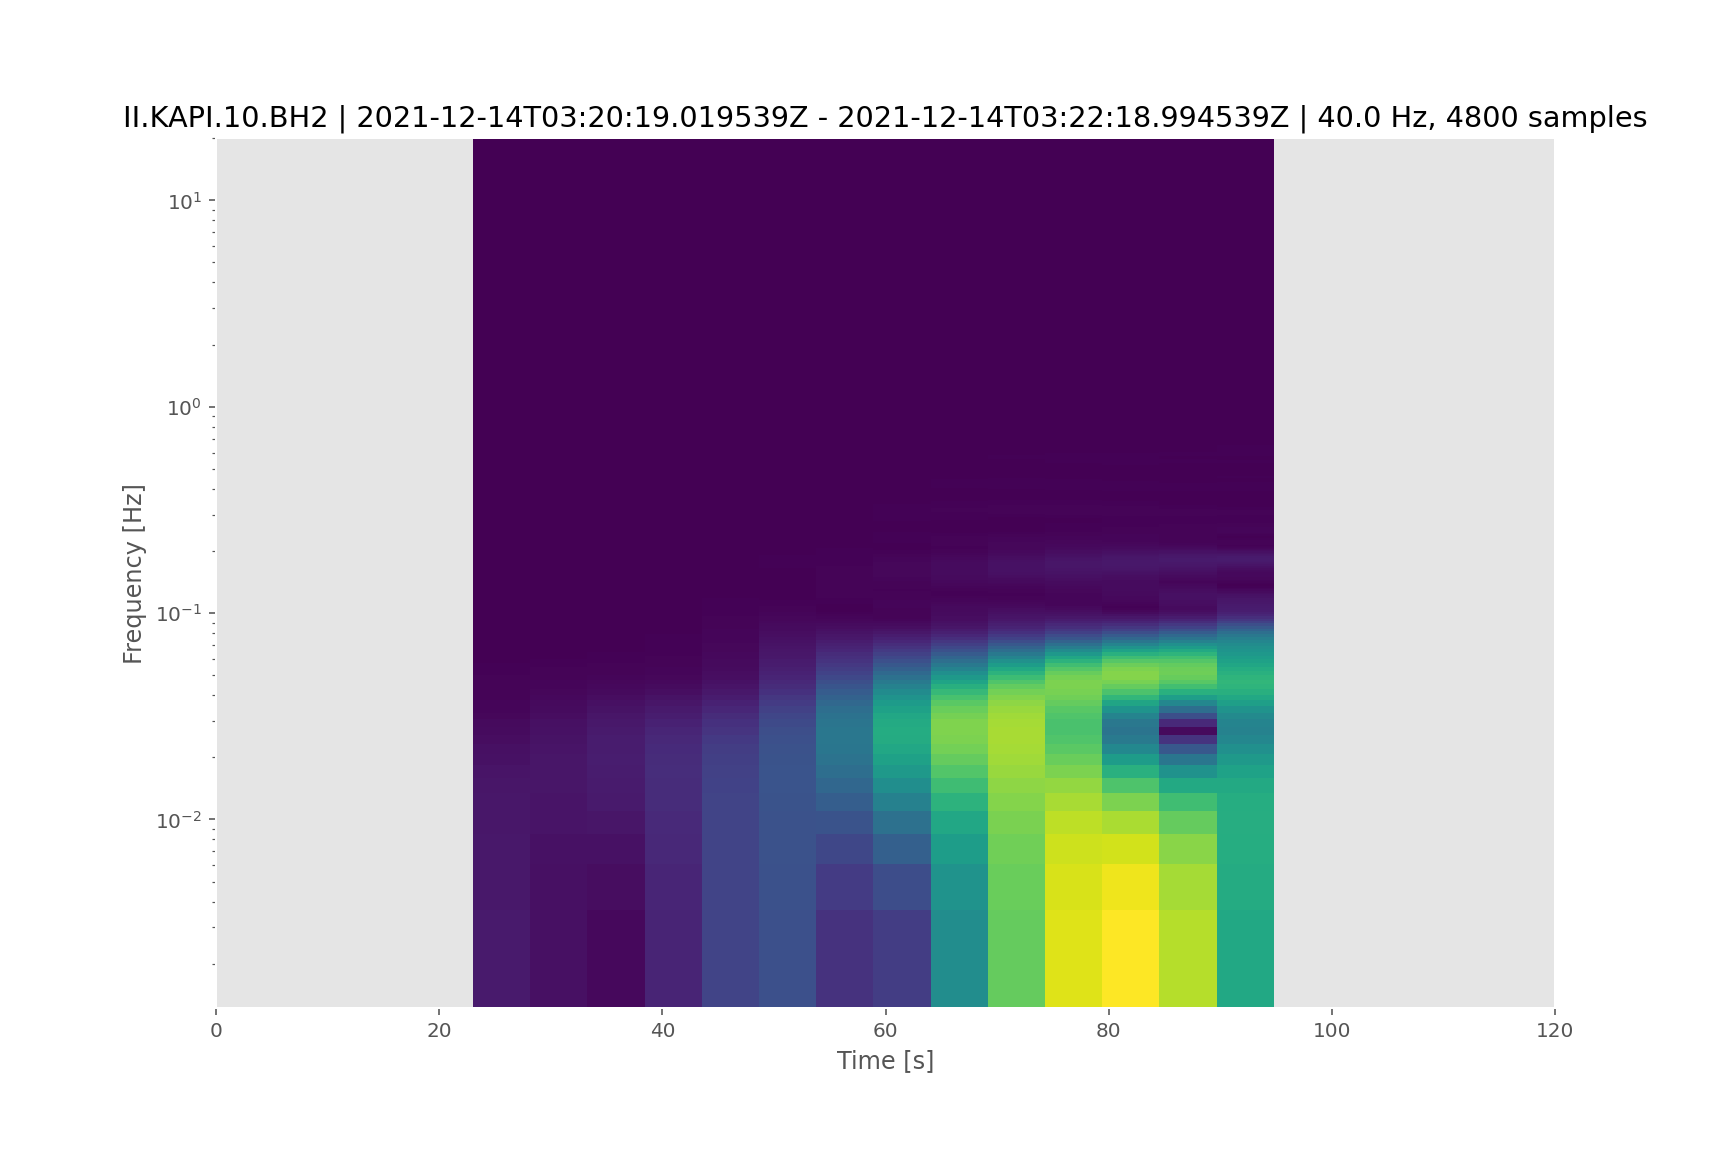

<IPython.core.display.Javascript object>


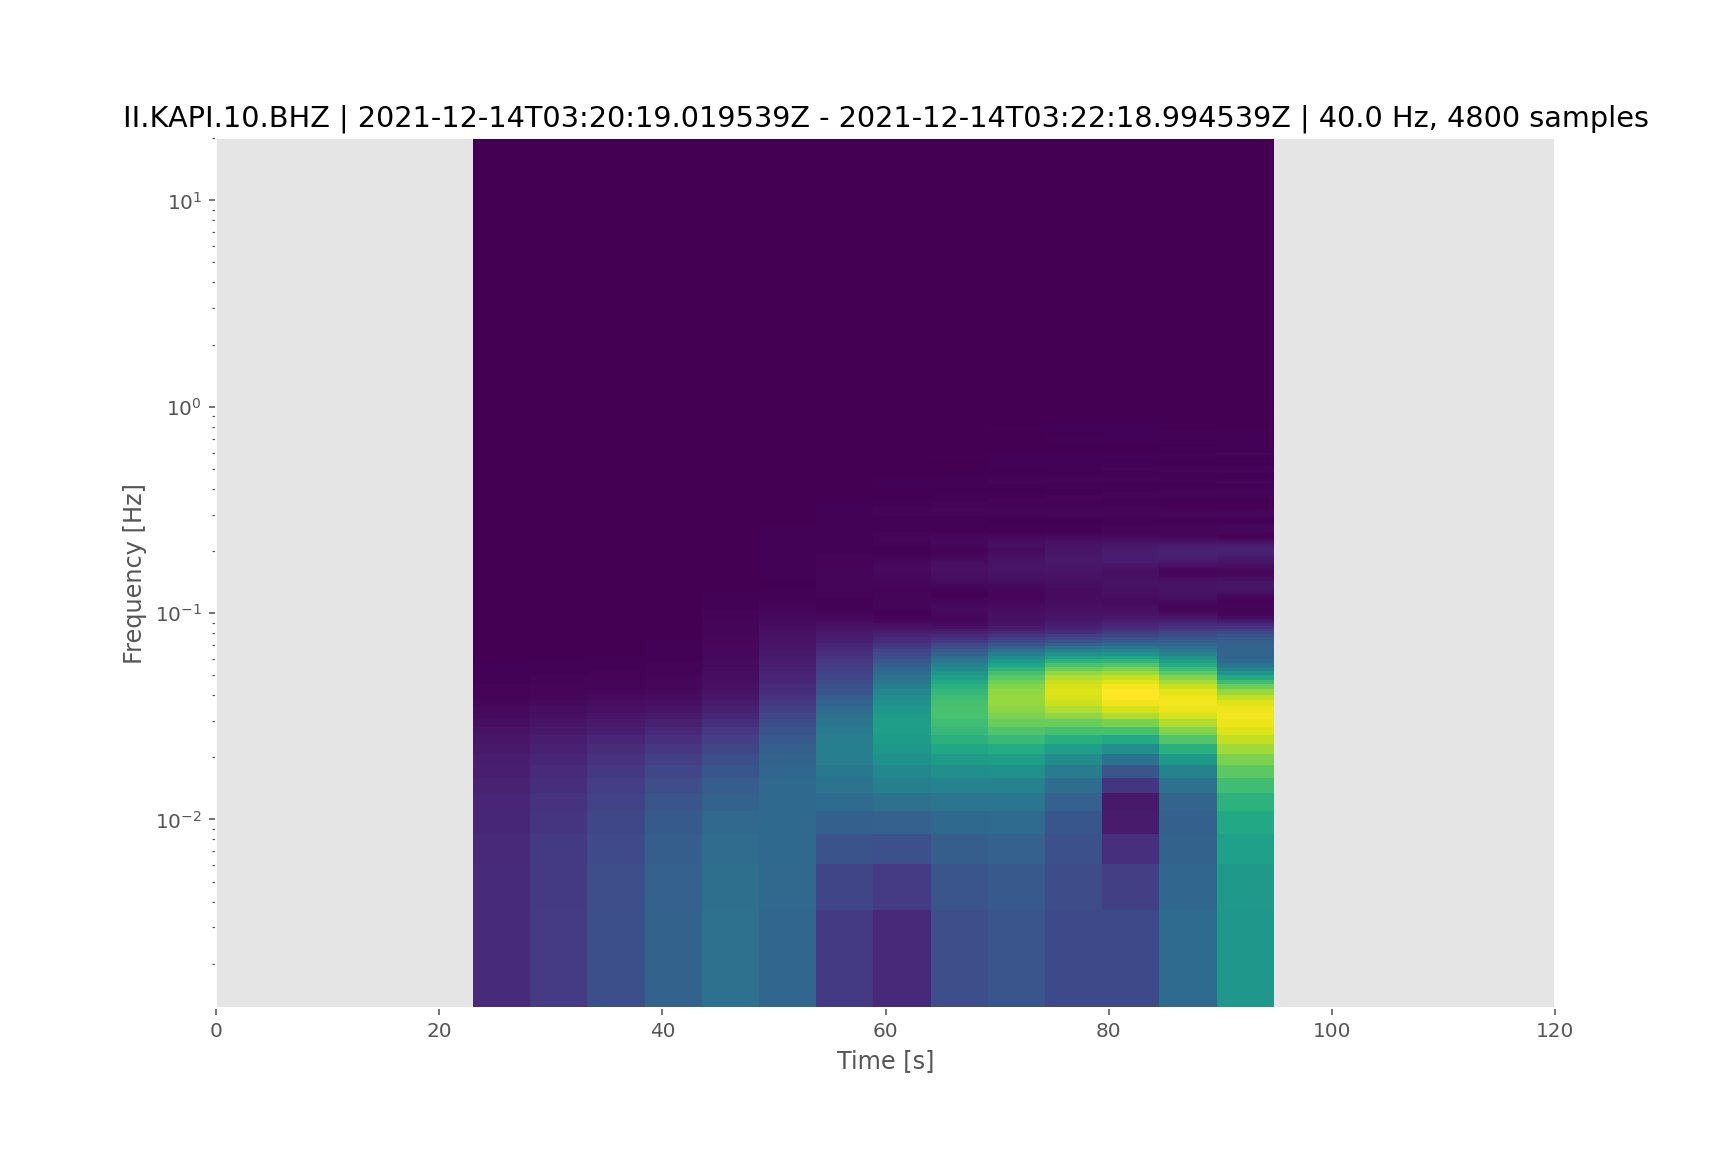

[None, None, None]

In [11]:
st.spectrogram(wlen=50,log=True)

## Mengambil `trace` dari `stream`

Ada beberapa cara mengambil `trace` dari stream, paling mudah adalah menggunakan indeksing:

In [12]:
tr_BHZ = st[0]
print(tr_BHZ)

II.KAPI.10.BH1 | 2021-12-14T03:20:19.019539Z - 2021-12-14T03:22:18.994539Z | 40.0 Hz, 4800 samples


<IPython.core.display.Javascript object>


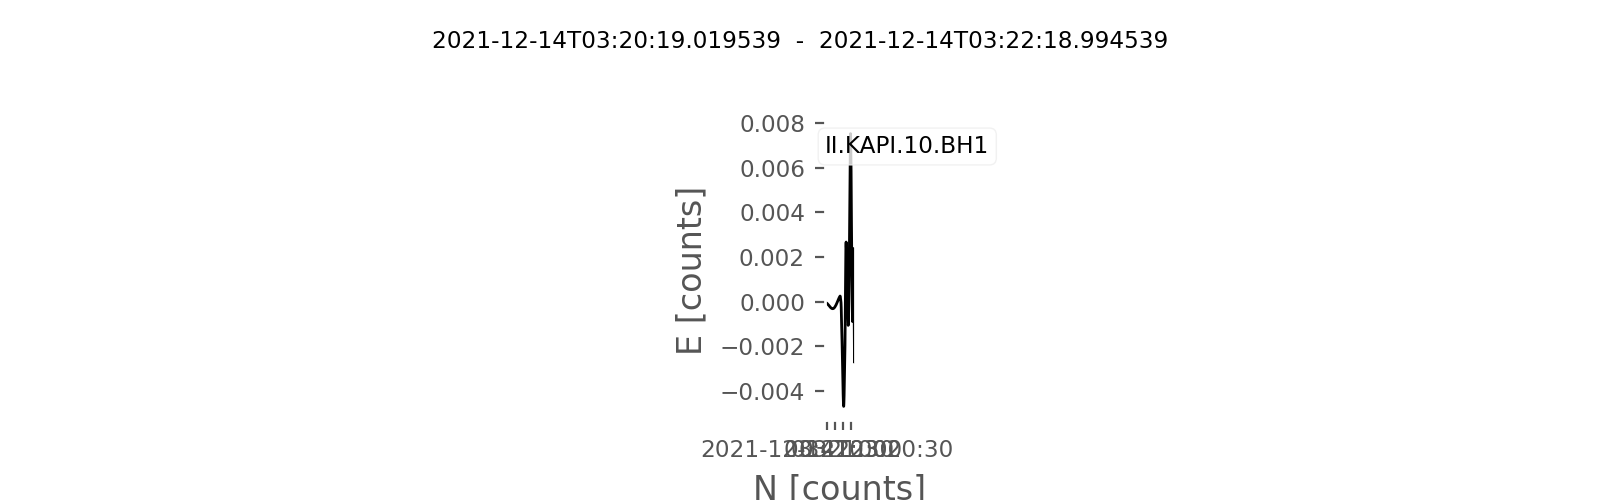

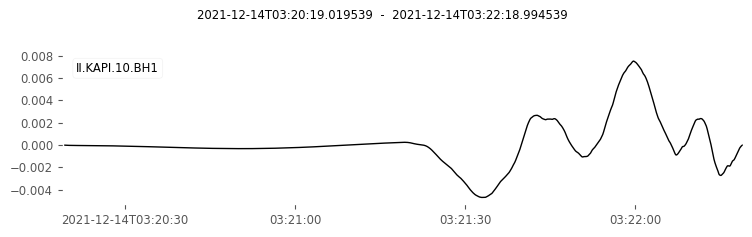

In [13]:
tr_BHZ.plot()

metode pada `trace` sebagian besar sama dengan metode pada `stream`:

<IPython.core.display.Javascript object>


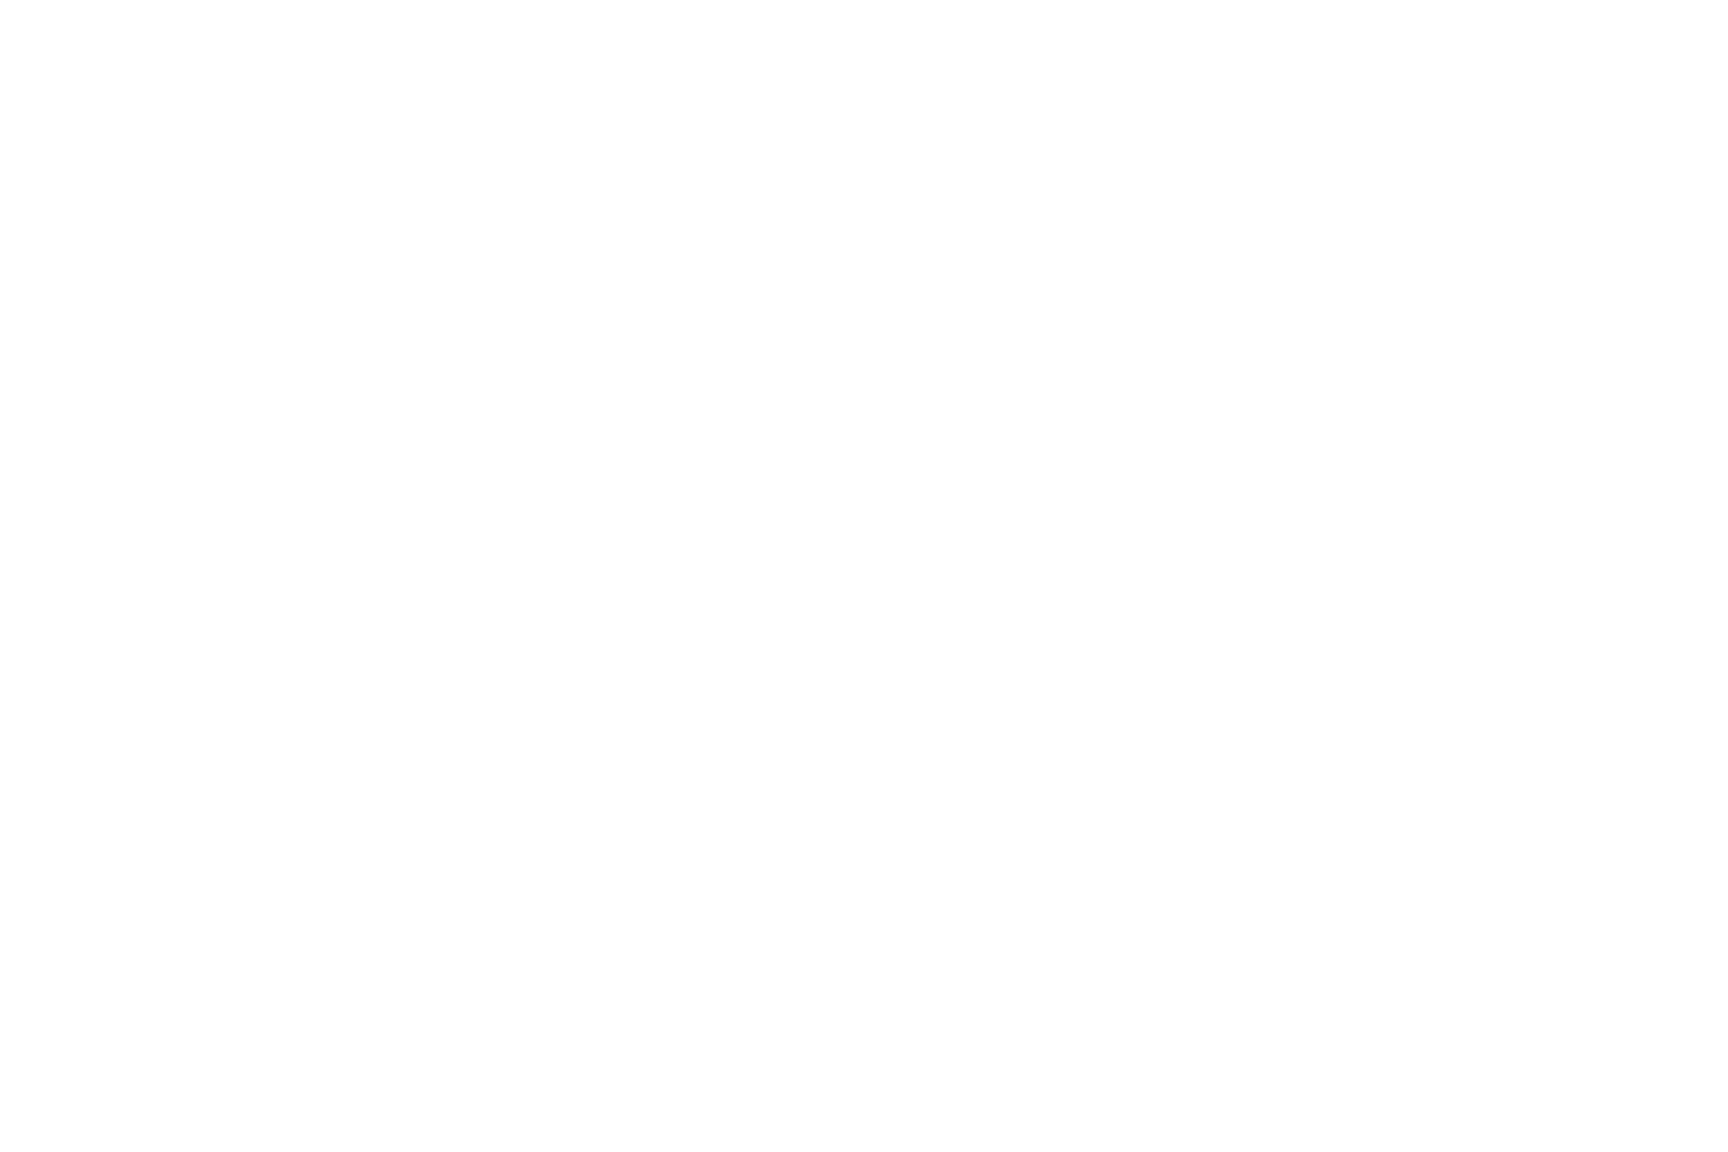

In [14]:
tr_BHZ.spectrogram(wlen=50, log=True)

<IPython.core.display.Javascript object>


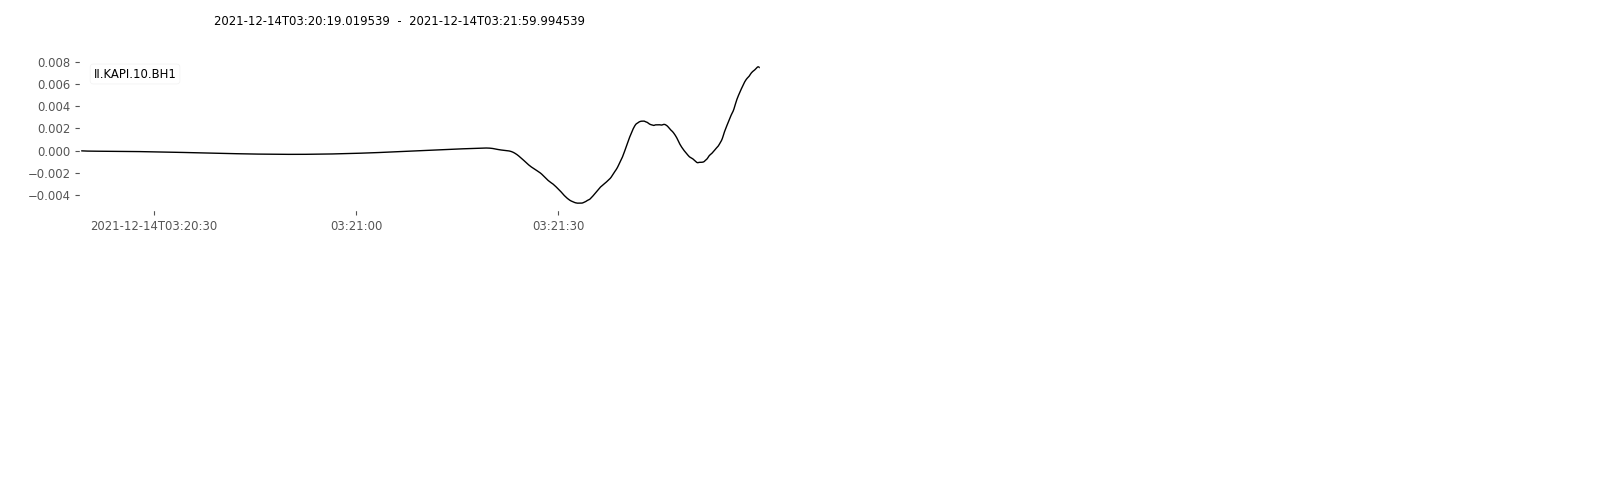

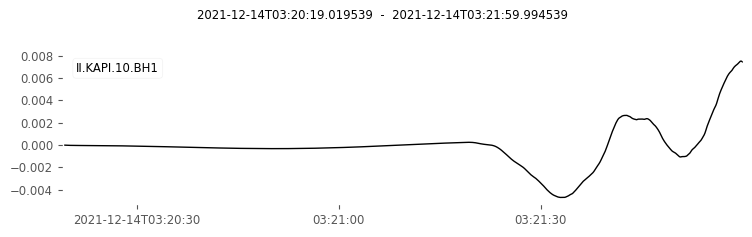

In [15]:
start=UTCDateTime("2021-12-14T03:20:00")
stop=start + 2*60 #2 menit
tr_BHZ_slice = tr_BHZ.slice(start,stop)
tr_BHZ_slice.plot()

### Mengambil informasi dari `trace`

Informasi tentang rekaman dapat dilihat dengan atribut `stats`"

In [16]:
tr_BHZ.stats

         network: II
         station: KAPI
        location: 10
         channel: BH1
       starttime: 2021-12-14T03:20:19.019539Z
         endtime: 2021-12-14T03:22:18.994539Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 4800
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 10, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 122880})

Jika ingin mengambil informasi spesifik:

In [17]:
tr_BHZ.stats.network

'II'

### Mengambil data dari `trace`

Data dapat diambil dengan atribut `.data`:

In [18]:
import matplotlib.pyplot as plt
data_BHZ=tr_BHZ.data

plt.plot(range(len(data_BHZ)), data_BHZ)

### Contoh mengeplot gerak partikel

Kita akan terlebih dahulu memanggil data untuk komponen BHZ, BHE, dan BHN

In [19]:
print(st)

3 Trace(s) in Stream:
II.KAPI.10.BH1 | 2021-12-14T03:20:19.019539Z - 2021-12-14T03:22:18.994539Z | 40.0 Hz, 4800 samples
II.KAPI.10.BH2 | 2021-12-14T03:20:19.019539Z - 2021-12-14T03:22:18.994539Z | 40.0 Hz, 4800 samples
II.KAPI.10.BHZ | 2021-12-14T03:20:19.019539Z - 2021-12-14T03:22:18.994539Z | 40.0 Hz, 4800 samples


#### Sekitar gelombang P

Kita memotong di sekitar waktu gelombang P:

<IPython.core.display.Javascript object>


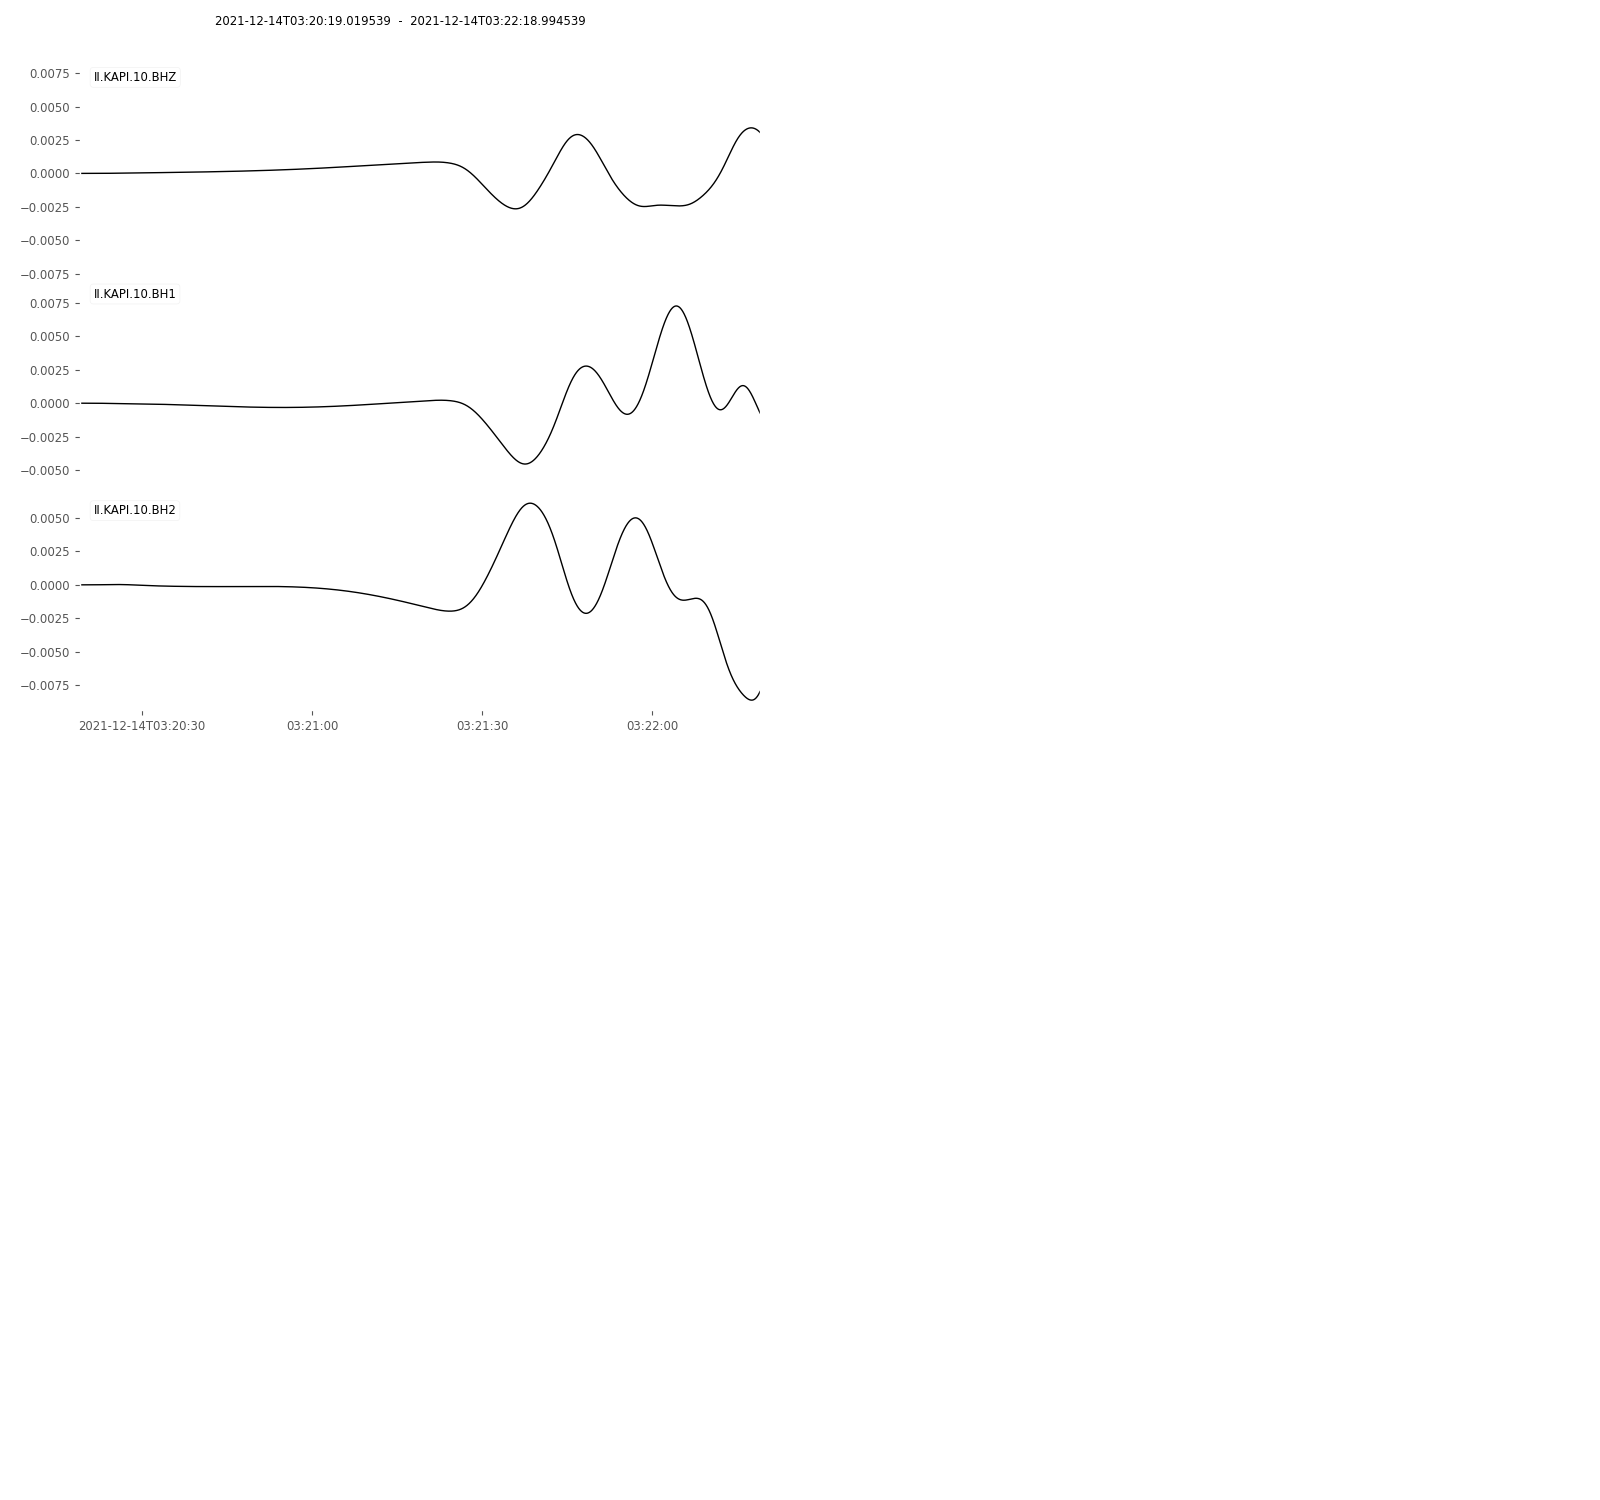

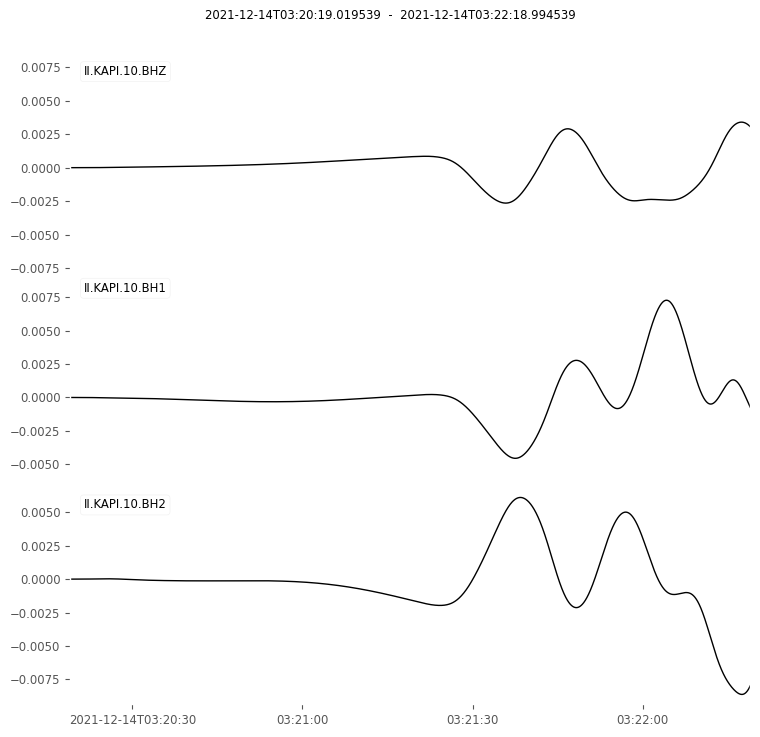

In [20]:
st_pm = st.copy()

P=UTCDateTime("2021-12-14 03:21:19")
start=P-1*60 # 1 menit sebelum
stop=P+1*60 # 1 menit sesudah

st_pm = st_pm.slice(start,stop)
st_pm.filter("lowpass", freq=0.1)
st_pm.plot()


#### Mengambil data untuk masing-masing komponen

In [21]:
trdata_BHZ=st_pm[1].data
trdata_BHE=st_pm[0].data
trdata_BHN=st_pm[2].data

#### Mengeplot untuk Z-N

In [22]:
plt.plot(trdata_BHZ,trdata_BHN)
plt.xlabel("Z [counts]")
plt.ylabel("N [counts]")
plt.gca().set_aspect('equal')

#### Mengeplot untuk Z-E

In [23]:
plt.plot(trdata_BHZ,trdata_BHE)
plt.xlabel("Z [counts]")
plt.ylabel("E [counts]")
plt.gca().set_aspect('equal')

#### Mengeplot untuk N-E

In [24]:
plt.plot(trdata_BHN,trdata_BHE)
plt.xlabel("N [counts]")
plt.ylabel("E [counts]")
plt.gca().set_aspect('equal')

### Sekitar Gelombang S

<IPython.core.display.Javascript object>


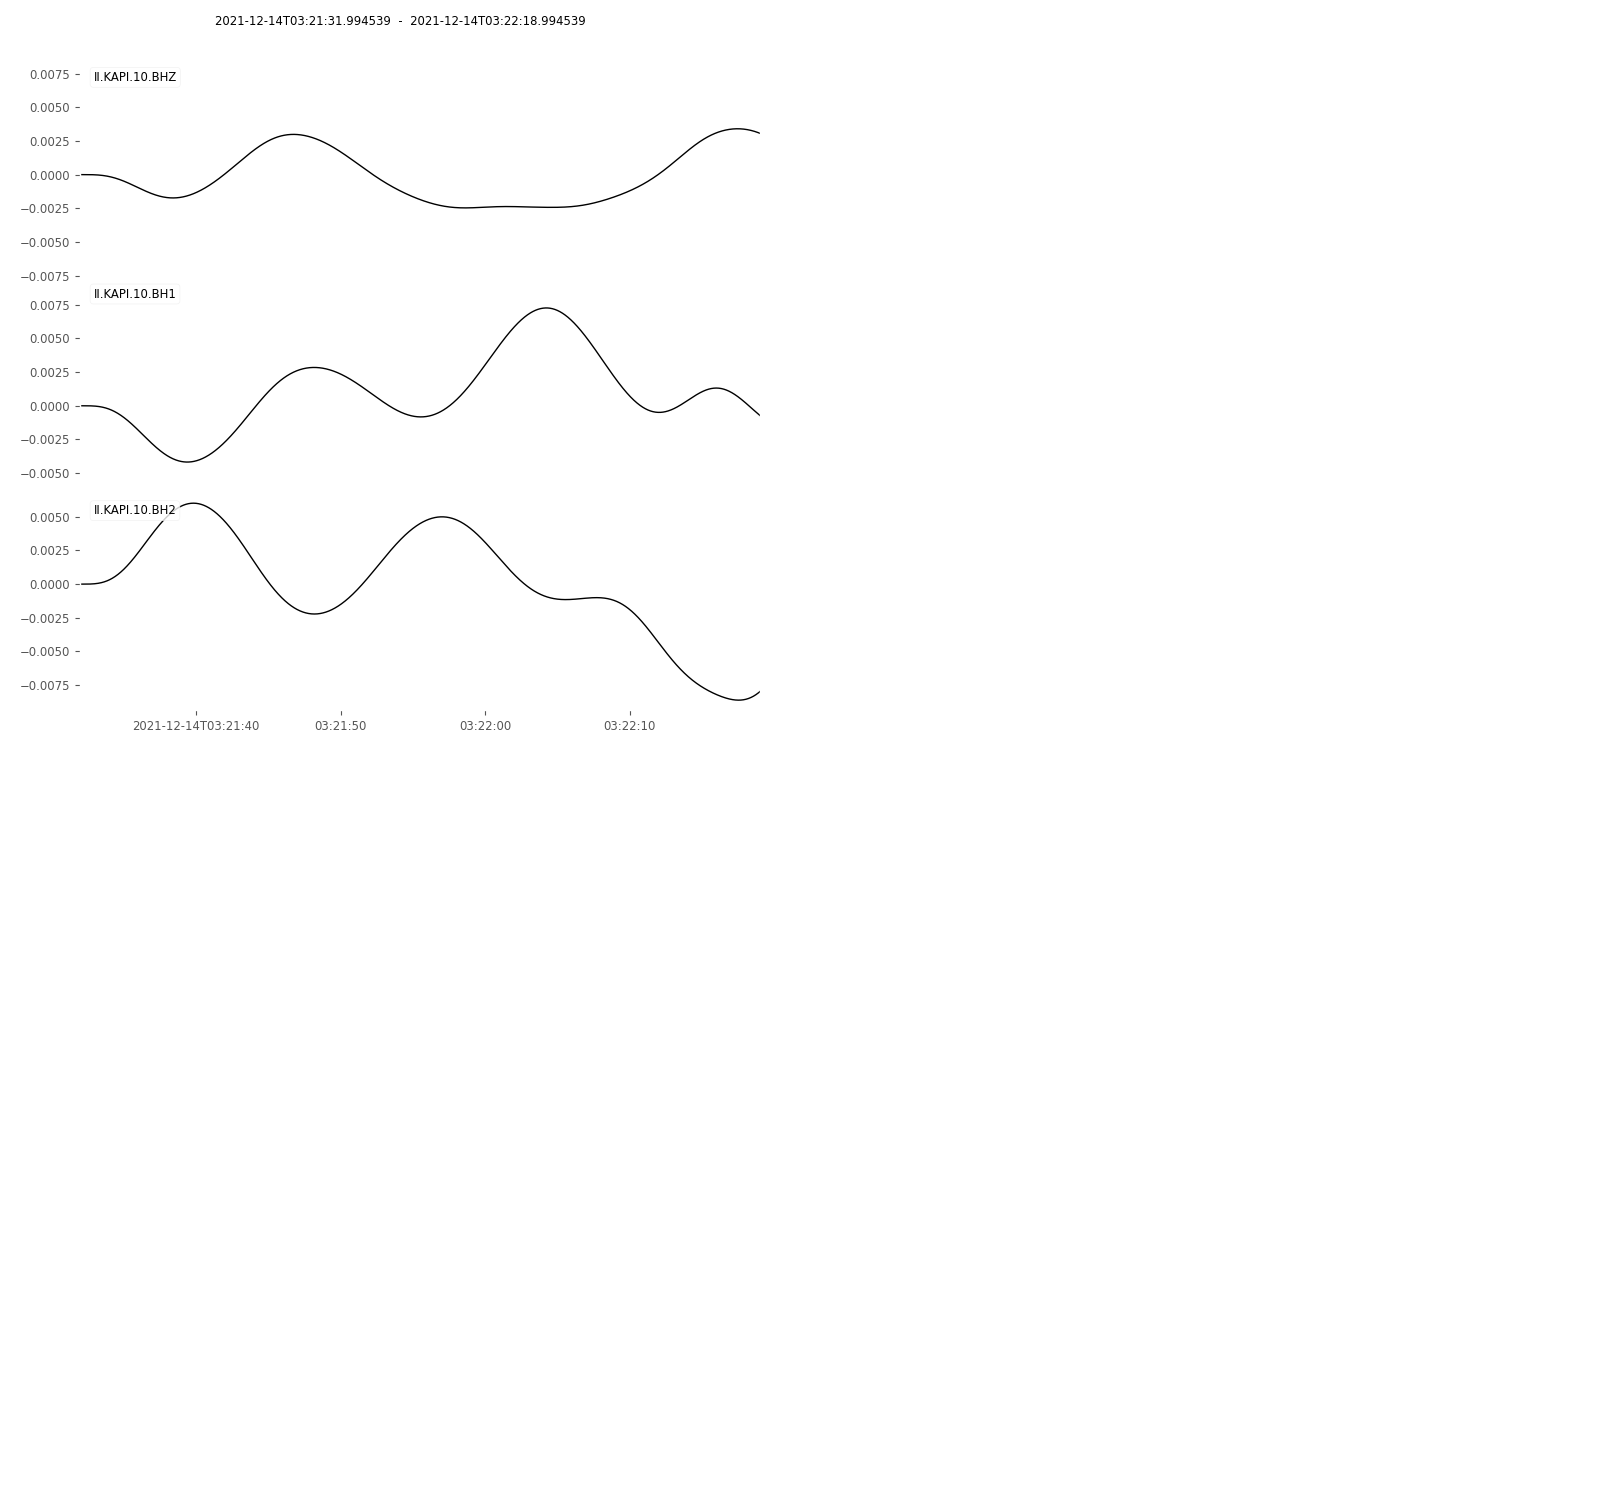

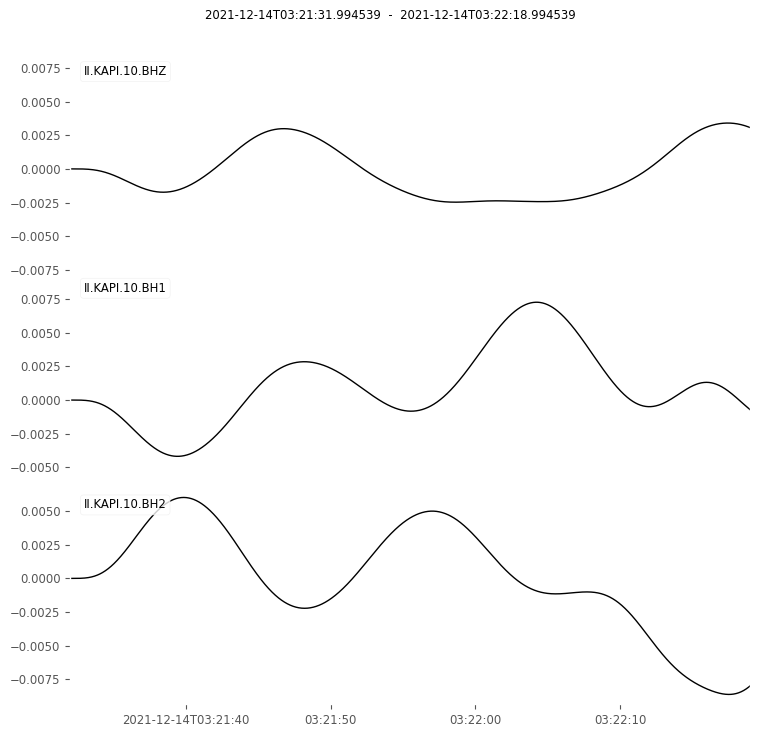

In [25]:
st_sm = st.copy()

S=UTCDateTime("2021-12-14T03:22:02")
start=S-0.5*60 # 0.5 menit sebelum
stop=S+1*60 # 1 menit sesudah

st_sm = st_sm.slice(start,stop)
st_sm.filter("lowpass", freq=0.1)
st_sm.plot()

In [26]:
Strdata_BHZ=st_sm[1].data
Strdata_BHE=st_sm[0].data
Strdata_BHN=st_sm[2].data

In [27]:
plt.plot(Strdata_BHZ,Strdata_BHN)
plt.xlabel("Z [counts]")
plt.ylabel("N [counts]")
plt.gca().set_aspect('equal')

In [28]:
plt.plot(Strdata_BHZ,Strdata_BHE)
plt.xlabel("Z [counts]")
plt.ylabel("E [counts]")
plt.gca().set_aspect('equal')

In [29]:
plt.plot(Strdata_BHN,Strdata_BHE)
plt.xlabel("N [counts]")
plt.ylabel("E [counts]")
plt.gca().set_aspect('equal')

### Sekitar gelombang Love

<IPython.core.display.Javascript object>


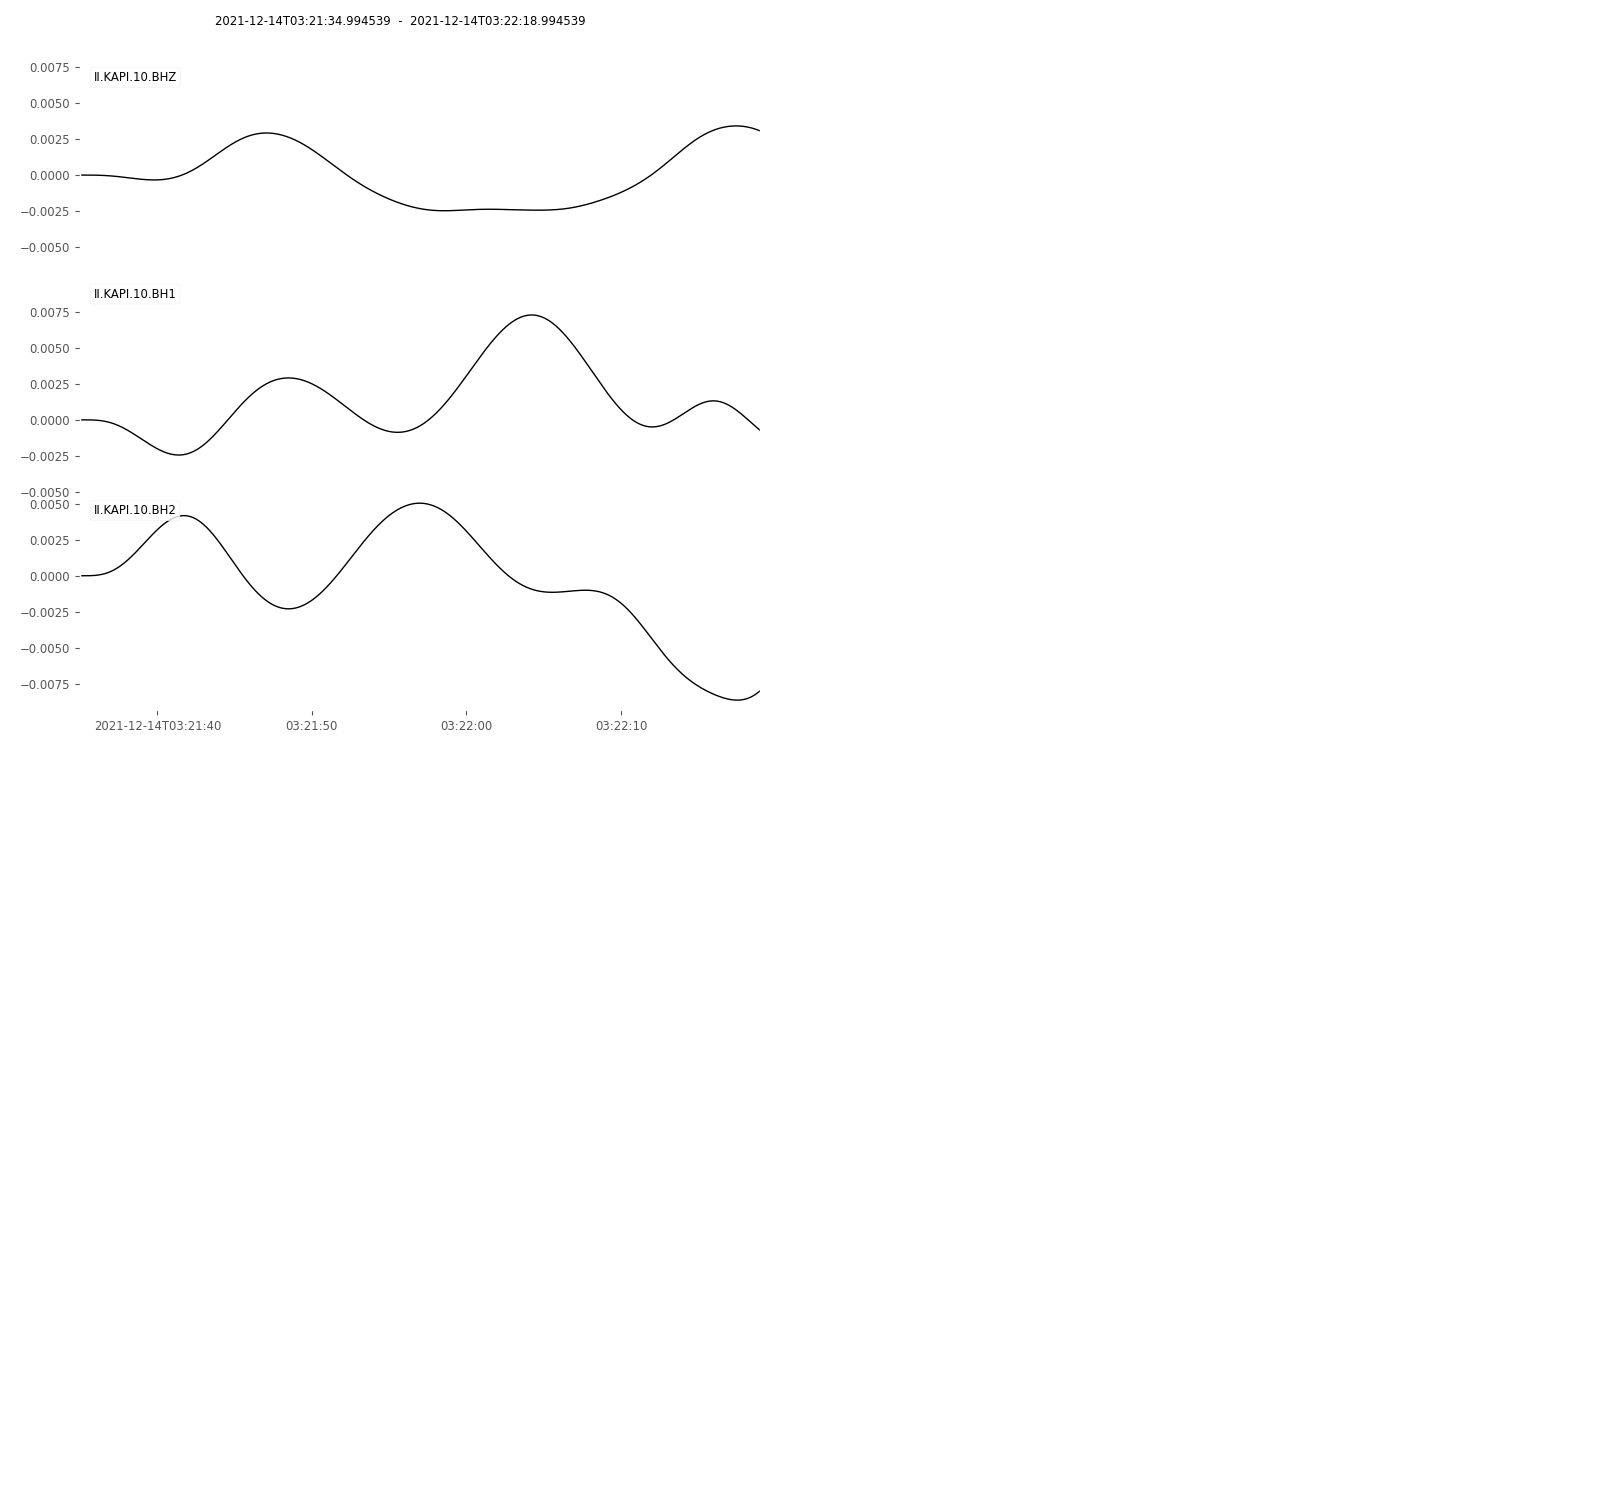

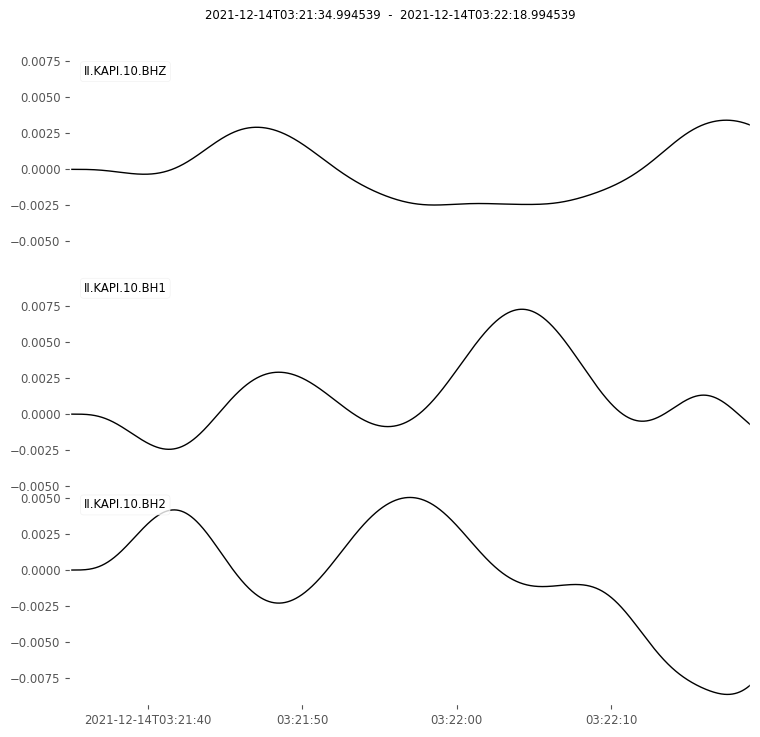

In [30]:
st_Lm = st.copy()

L=UTCDateTime("2021-12-14T03:22:05")
start=L-0.5*60 # 1 menit sebelum
stop=L+3*60 # 1 menit sesudah

st_Lm = st_Lm.slice(start,stop)
st_Lm.filter("lowpass", freq=0.1)
st_Lm.plot()

In [31]:
Ltrdata_BHZ=st_Lm[1].data
Ltrdata_BHE=st_Lm[0].data
Ltrdata_BHN=st_Lm[2].data

In [32]:
plt.plot(Ltrdata_BHZ,Ltrdata_BHN)
plt.xlabel("Z [counts]")
plt.ylabel("N [counts]")
plt.gca().set_aspect('equal')

In [33]:
plt.plot(Ltrdata_BHZ,Ltrdata_BHE)
plt.xlabel("Z [counts]")
plt.ylabel("E [counts]")
plt.gca().set_aspect('equal')

In [34]:
plt.plot(Ltrdata_BHN,Ltrdata_BHE)
plt.xlabel("N [counts]")
plt.ylabel("E [counts]")
plt.gca().set_aspect('equal')